# TFM

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import toml
import random
import tensorflow as tf
from sklearn.metrics import (
    accuracy_score, 
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

## Ejecución de código en GPU

In [2]:
import tensorflow as tf

# Comprobar la versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Listar todos los dispositivos físicos disponibles
physical_devices = tf.config.list_physical_devices('GPU')

if physical_devices:
    print("🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):")
    for gpu in physical_devices:
        print(f'\t{gpu}')
else:
    print("🔴 No se ha detectado ninguna GPU. TensorFlow está utilizando la CPU.")

TensorFlow version: 2.10.0
🟢 TensorFlow ha detectado la(s) siguiente(s) GPU(s):
	PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Lectura de fichero

In [3]:
data_dict = {}
DATA_DIR = '../../data/'

for data_folder in os.listdir(DATA_DIR):
    *data_files, config_file = os.listdir(f'{DATA_DIR}/{data_folder}')

    leak_value = toml.load(f'{DATA_DIR}/{data_folder}/{config_file}')['tanks']['flow_value']

    train_dataframe, test_data = random.sample(data_files, 2)

    data_dict[data_folder] = {
        'leak_value': leak_value,
        'train_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{train_dataframe}').drop(columns=['Unnamed: 0']),
        'test_dataframe': pd.read_csv(f'{DATA_DIR}/{data_folder}/{test_data}').drop(columns=['Unnamed: 0'])
    }

### Conjuntos de datos de entrenamiento

In [4]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200010452,83",-5870,"8533,64","1200013116,47","1200013056,31","-60,16","-138,43",0
1,2,"1200013056,31",-6020,"2991,87","1200010028,18","1200009980,34","-47,84","-218,47",0
2,3,"1200009980,34",-6075,"6480,05","1200010385,39","1200010362,91","-22,48","-163,56",0
3,4,"1200010362,91",-6000,"6055,09","1200010418,0","1200010380,02","-37,98","-129,41",0
4,5,"1200010380,02",-6035,"6523,62","1200010868,64","1200010896,18","27,54","-93,17",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1200001278,22",-6125,"5951,97","1200001105,19","1200001208,21","103,02","147,65",1
1496,1497,"1200001208,21",-5685,"7347,61","1200002870,82","1200002794,29","-76,53","-14,67",1
1497,1498,"1200002794,29",-6010,"6673,2","1200003457,49","1200003384,64","-72,85","-171,13",1
1498,1499,"1200003384,64",-6105,"6665,37","1200003945,01","1200003912,28","-32,73","-148,91",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200008469,74",-5925,"8061,84","1200010606,58","1200010745,35","138,77","403,57",0
1,2,"1200010745,35",-5955,"6366,8","1200011157,15","1200011131,54","-25,61","297,22",0
2,3,"1200011131,54",-6080,"3452,41","1200008503,95","1200008577,84","73,89","304,09",0
3,4,"1200008577,84",-6095,"6083,08","1200008565,92","1200008491,59","-74,33","235,47",0
4,5,"1200008491,59",-5940,"7005,59","1200009557,18","1200009531,5","-25,68","252,03",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199980270,44",-5835,"6635,8","1199981071,24","1199981061,13","-10,11","-300,35",1
1496,1497,"1199981061,13",-6280,"3650,15","1199978431,28","1199978350,07","-81,21","-405,73",1
1497,1498,"1199978350,07",-6110,"6502,22","1199978742,29","1199978847,6","105,31","-251,54",1
1498,1499,"1199978847,6",-5850,"6106,23","1199979103,83","1199978940,44","-163,39","-384,34",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200008915,35",-6035,"7947,71","1200010828,06","1200010811,44","-16,62","62,91",0
1,2,"1200010811,44",-5900,"6183,59","1200011095,03","1200011060,21","-34,82","92,2",0
2,3,"1200011060,21",-6020,"6644,11","1200011684,32","1200011727,09","42,77","113,13",0
3,4,"1200011727,09",-6055,"3492,71","1200009164,8","1200009229,99","65,19","165,74",0
4,5,"1200009229,99",-5960,"8052,45","1200011322,44","1200011321,7","-0,74","134,38",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199959066,73",-6330,"6952,22","1199959688,95","1199959710,68","21,73","-479,36",1
1496,1497,"1199959710,68",-6340,"3909,66","1199957280,34","1199957248,34","-32,0","-402,01",1
1497,1498,"1199957248,34",-5850,"8013,89","1199959412,23","1199959320,09","-92,14","-426,9",1
1498,1499,"1199959320,09",-5920,"3970,41","1199957370,5","1199957280,24","-90,26","-495,62",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200008581,35",-5880,"6972,4","1200009673,75","1200009678,17","4,42","190,92",0
1,2,"1200009678,17",-6275,"6417,9","1200009821,07","1200009756,49","-64,58","241,34",0
2,3,"1200009756,49",-5800,"7658,37","1200011614,86","1200011584,16","-30,7","140,34",0
3,4,"1200011584,16",-5790,"3846,82","1200009640,98","1200009679,59","38,61","158,12",0
4,5,"1200009679,59",-5995,"6647,37","1200010331,96","1200010288,15","-43,81","120,42",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199939416,57",-6045,"6534,52","1199939906,09","1199939715,39","-190,7","-805,65",1
1496,1497,"1199939715,39",-5810,"4188,85","1199938094,24","1199938105,31","11,07","-723,79",1
1497,1498,"1199938105,31",-5965,"7513,67","1199939653,98","1199939564,38","-89,6","-786,01",1
1498,1499,"1199939564,38",-6655,"3111,35","1199936020,73","1199935949,92","-70,81","-751,69",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200008407,63",-5810,"9502,47","1200012100,1","1200012032,35","-67,75","295,37",0
1,2,"1200012032,35",-5720,"6466,38","1200012778,73","1200012735,01","-43,72","276,18",0
2,3,"1200012735,01",-6355,"4782,6","1200011162,61","1200011208,86","46,25","306,09",0
3,4,"1200011208,86",-5655,"6627,93","1200012181,79","1200012084,44","-97,35","137,16",0
4,5,"1200012084,44",-5930,"4057,27","1200010211,71","1200010171,21","-40,5","48,0",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199916951,88",-5980,"2984,04","1199913955,92","1199913833,06","-122,86","-1042,86",1
1496,1497,"1199913833,06",-5945,"10162,12","1199918050,18","1199917950,34","-99,84","-1075,19",1
1497,1498,"1199917950,34",-6170,"4101,74","1199915882,08","1199915816,62","-65,46","-1059,98",1
1498,1499,"1199915816,62",-6100,"8157,13","1199917873,75","1199917686,67","-187,08","-1170,9",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200008095,73",-6135,"6966,7","1200008927,43","1200008966,36","38,93","134,2",0
1,2,"1200008966,36",-6295,"7910,9","1200010582,26","1200010659,21","76,95","166,98",0
2,3,"1200010659,21",-5730,"5971,03","1200010900,24","1200010925,05","24,81","188,33",0
3,4,"1200010925,05",-5560,"7034,99","1200012400,04","1200012403,31","3,27","78,36",0
4,5,"1200012403,31",-5680,"4336,42","1200011059,73","1200011090,22","30,49","127,41",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199897158,23",-6055,"3494,99","1199894598,22","1199894474,26","-123,96","-1599,37",1
1496,1497,"1199894474,26",-5665,"7137,63","1199895946,89","1199895825,57","-121,32","-1535,62",1
1497,1498,"1199895825,57",-6145,"5923,94","1199895604,51","1199895411,27","-193,24","-1574,99",1
1498,1499,"1199895411,27",-6030,"3989,55","1199893370,82","1199893214,58","-156,24","-1617,68",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200009078,02",-6185,"8366,7","1200011259,72","1200011257,06","-2,66","239,29",0
1,2,"1200011257,06",-6155,"5810,76","1200010912,82","1200010923,42","10,6","219,65",0
2,3,"1200010923,42",-5990,"6618,36","1200011551,78","1200011456,36","-95,42","132,86",0
3,4,"1200011456,36",-6035,"4543,11","1200009964,47","1200009922,18","-42,29","13,09",0
4,5,"1200009922,18",-6045,"6582,13","1200010459,31","1200010465,34","6,03","47,45",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199874818,91",-6205,"5347,61","1199873961,52","1199873766,14","-195,38","-1863,48",1
1496,1497,"1199873766,14",-6000,"4251,89","1199872018,03","1199871836,83","-181,2","-1860,59",1
1497,1498,"1199871836,83",-6235,"6978,67","1199872580,5","1199872406,89","-173,61","-1776,28",1
1498,1499,"1199872406,89",-5910,"8943,9","1199875440,79","1199875335,95","-104,84","-1790,84",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200005252,09",-6010,"5929,02","1200005171,11","1200005262,91","91,8","428,44",0
1,2,"1200005262,91",-5975,"5987,84","1200005275,75","1200005289,38","13,63","470,09",0
2,3,"1200005289,38",-6265,"6066,59","1200005090,97","1200005002,49","-88,48","385,5",0
3,4,"1200005002,49",-5575,"7018,16","1200006445,65","1200006448,04","2,39","298,13",0
4,5,"1200006448,04",-5795,"4751,94","1200005404,98","1200005450,72","45,74","382,12",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199853620,72",-6230,"6200,75","1199853591,47","1199853402,93","-188,54","-1923,11",1
1496,1497,"1199853402,93",-6465,"3592,91","1199850530,84","1199850334,18","-196,66","-1894,99",1
1497,1498,"1199850334,18",-6120,"11077,22","1199855291,4","1199855149,01","-142,39","-1856,9",1
1498,1499,"1199855149,01",-6010,"3654,57","1199852793,58","1199852558,95","-234,63","-1954,87",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200006280,52",-6115,"8969,15","1200009134,67","1200009041,18","-93,49","-161,48",0
1,2,"1200009041,18",-6035,"6998,03","1200010004,21","1200010019,56","15,35","-156,7",0
2,3,"1200010019,56",-5855,"7748,79","1200011913,35","1200011912,27","-1,08","-88,44",0
3,4,"1200011912,27",-6510,"4577,67","1200009979,94","1200009958,09","-21,85","-38,98",0
4,5,"1200009958,09",-5995,"6430,57","1200010393,66","1200010410,46","16,8","-55,17",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199832979,6",-6095,"6839,45","1199833724,05","1199833585,5","-138,55","-2198,62",1
1496,1497,"1199833585,5",-6280,"5519,48","1199832824,98","1199832609,95","-215,03","-2239,41",1
1497,1498,"1199832609,95",-5965,"2954,3","1199829599,25","1199829387,09","-212,16","-2161,13",1
1498,1499,"1199829387,09",-6080,"7826,26","1199831133,35","1199831082,71","-50,64","-2032,71",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200000134,98",-6360,"7784,65","1200001559,63","1200001517,36","-42,27","-41,72",0
1,2,"1200001517,36",-5910,"8089,23","1200003696,59","1200003617,72","-78,87","-146,94",0
2,3,"1200003617,72",-5675,"8090,97","1200006033,69","1200005937,97","-95,72","-184,68",0
3,4,"1200005937,97",-6460,"5963,81","1200005441,78","1200005498,37","56,59","-159,77",0
4,5,"1200005498,37",-5930,"10973,13","1200010541,5","1200010530,93","-10,57","-91,49",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199812035,52",-6095,"4436,09","1199810376,61","1199810184,67","-191,94","-2487,98",1
1496,1497,"1199810184,67",-6145,"6751,41","1199810791,08","1199810596,96","-194,12","-2333,97",1
1497,1498,"1199810596,96",-5885,"6867,91","1199811579,87","1199811369,82","-210,05","-2356,86",1
1498,1499,"1199811369,82",-5705,"5148,44","1199810813,26","1199810556,55","-256,71","-2404,55",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200010828,14",-6060,"4428,2","1200009196,34","1200009178,17","-18,17","235,19",0
1,2,"1200009178,17",-6260,"8119,08","1200011037,25","1200011037,49","0,24","180,61",0
2,3,"1200011037,49",-5945,"5254,8","1200010347,29","1200010386,01","38,72","241,67",0
3,4,"1200010386,01",-6060,"6983,47","1200011309,48","1200011300,16","-9,32","211,53",0
4,5,"1200011300,16",-6100,"3731,51","1200008931,67","1200008843,74","-87,93","113,39",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199790080,48",-6075,"6269,3","1199790274,78","1199790069,3","-205,48","-2971,15",1
1496,1497,"1199790069,3",-6075,"4043,17","1199788037,47","1199787692,73","-344,74","-3012,85",1
1497,1498,"1199787692,73",-5845,"7684,14","1199789531,87","1199789282,97","-248,9","-3017,5",1
1498,1499,"1199789282,97",-5955,"6726,99","1199790054,96","1199789807,12","-247,84","-3000,43",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200003148,3",-6035,"8670,41","1200005783,71","1200005777,7","-6,01","22,79",0
1,2,"1200005777,7",-5970,"9103,28","1200008910,98","1200008825,92","-85,06","-65,22",0
2,3,"1200008825,92",-5710,"2991,7","1200006107,62","1200006083,28","-24,34","-124,08",0
3,4,"1200006083,28",-5870,"8012,29","1200008225,57","1200008246,98","21,41","-100,98",0
4,5,"1200008246,98",-5850,"8039,47","1200010436,45","1200010466,83","30,38","-6,61",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199770356,52",-5685,"4315,62","1199768987,14","1199768729,7","-257,44","-2884,56",1
1496,1497,"1199768729,7",-6175,"7851,65","1199770406,35","1199770041,77","-364,58","-3020,9",1
1497,1498,"1199770041,77",-6450,"6639,43","1199770231,2","1199769927,36","-303,84","-3019,08",1
1498,1499,"1199769927,36",-6085,"5282,12","1199769124,48","1199768758,53","-365,95","-3056,28",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200006914,71",-6320,"4593,85","1200005188,56","1200005234,06","45,5","63,01",0
1,2,"1200005234,06",-5780,"8385,93","1200007839,99","1200007820,93","-19,06","54,34",0
2,3,"1200007820,93",-6150,"2982,7","1200004653,63","1200004664,66","11,03","57,52",0
3,4,"1200004664,66",-6025,"8946,39","1200007586,05","1200007649,99","63,94","229,79",0
4,5,"1200007649,99",-6070,"3969,41","1200005549,4","1200005568,57","19,17","233,06",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199747856,63",-6110,"6856,01","1199748602,64","1199748252,65","-349,99","-3554,23",1
1496,1497,"1199748252,65",-6015,"6149,13","1199748386,78","1199748012,54","-374,24","-3514,25",1
1497,1498,"1199748012,54",-5950,"6539,92","1199748602,46","1199748264,95","-337,51","-3543,95",1
1498,1499,"1199748264,95",-6010,"5956,12","1199748211,07","1199747926,59","-284,48","-3366,0",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200005425,79",-6620,"4616,19","1200003421,98","1200003435,74","13,76","195,72",0
1,2,"1200003435,74",-5720,"9992,35","1200007708,09","1200007708,57","0,48","231,39",0
2,3,"1200007708,57",-6140,"5999,06","1200007567,63","1200007568,68","1,05","182,4",0
3,4,"1200007568,68",-6095,"5939,4","1200007413,08","1200007467,33","54,25","170,81",0
4,5,"1200007467,33",-5900,"8025,31","1200009592,64","1200009570,63","-22,01","167,21",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199726165,79",-6260,"7064,91","1199726970,7","1199726531,81","-438,89","-3867,31",1
1496,1497,"1199726531,81",-5665,"7669,19","1199728536,0","1199728127,42","-408,58","-3892,28",1
1497,1498,"1199728127,42",-5995,"6250,84","1199728383,26","1199728152,96","-230,3","-3712,97",1
1498,1499,"1199728152,96",-6040,"2754,27","1199724867,23","1199724546,19","-321,04","-3679,43",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200007054,9",-6075,"7643,57","1200008623,47","1200008652,96","29,49","138,29",0
1,2,"1200008652,96",-6135,"4010,59","1200006528,55","1200006500,82","-27,73","82,35",0
2,3,"1200006500,82",-6130,"7014,92","1200007385,74","1200007393,4","7,66","94,84",0
3,4,"1200007393,4",-6145,"2956,14","1200004204,54","1200004252,4","47,86","121,09",0
4,5,"1200004252,4",-6125,"9425,67","1200007553,07","1200007470,21","-82,86","83,83",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199705654,45",-6075,"6010,53","1199705589,98","1199705161,96","-428,02","-4102,17",1
1496,1497,"1199705161,96",-5995,"4987,1","1199704154,06","1199703837,13","-316,93","-4034,16",1
1497,1498,"1199703837,13",-6020,"8878,75","1199706695,88","1199706359,47","-336,41","-3916,58",1
1498,1499,"1199706359,47",-5945,"3989,05","1199704403,52","1199703930,86","-472,66","-3992,78",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200004113,69",-6415,"7010,3","1200004708,99","1200004709,76","0,77","241,77",0
1,2,"1200004709,76",-6075,"9460,73","1200008095,49","1200008171,2","75,71","260,65",0
2,3,"1200008171,2",-6070,"7444,24","1200009545,44","1200009573,3","27,86","308,0",0
3,4,"1200009573,3",-5430,"7023,31","1200011166,61","1200011142,46","-24,15","293,15",0
4,5,"1200011142,46",-5945,"6114,59","1200011312,05","1200011325,16","13,11","266,24",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199683989,85",-5825,"6045,83","1199684210,68","1199683723,11","-487,57","-4289,58",1
1496,1497,"1199683723,11",-5780,"9191,24","1199687134,35","1199686552,4","-581,95","-4488,84",1
1497,1498,"1199686552,4",-5930,"5280,15","1199685902,55","1199685497,13","-405,42","-4473,84",1
1498,1499,"1199685497,13",-6125,"4402,58","1199683774,71","1199683347,93","-426,78","-4501,29",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200007871,4",-6115,"10031,44","1200011787,84","1200011730,88","-56,96","339,31",0
1,2,"1200011730,88",-6050,"5009,61","1200010690,49","1200010747,24","56,75","332,34",0
2,3,"1200010747,24",-5930,"4611,05","1200009428,29","1200009538,77","110,48","396,36",0
3,4,"1200009538,77",-5965,"6083,04","1200009656,81","1200009657,58","0,77","282,65",0
4,5,"1200009657,58",-5970,"7567,7","1200011255,28","1200011263,46","8,18","282,94",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199662708,06",-6145,"6709,97","1199663273,03","1199662846,67","-426,36","-4303,66",1
1496,1497,"1199662846,67",-6260,"6915,12","1199663501,79","1199662997,59","-504,2","-4396,02",1
1497,1498,"1199662997,59",-6095,"6478,5","1199663381,09","1199662858,08","-523,01","-4460,27",1
1498,1499,"1199662858,08",-6145,"7004,88","1199663717,96","1199663274,93","-443,03","-4474,28",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200005256,03",-5990,"7747,79","1200007013,82","1200007034,97","21,15","24,41",0
1,2,"1200007034,97",-5915,"8195,9","1200009315,87","1200009361,63","45,76","61,54",0
2,3,"1200009361,63",-5860,"6917,63","1200010419,26","1200010435,27","16,01","50,67",0
3,4,"1200010435,27",-6120,"4751,54","1200009066,81","1200009083,28","16,47","40,06",0
4,5,"1200009083,28",-6085,"6006,65","1200009004,93","1200009046,47","41,54","88,77",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199641616,12",-6015,"7899,18","1199643500,3","1199642990,43","-509,87","-4679,65",1
1496,1497,"1199642990,43",-5745,"5761,28","1199643006,71","1199642569,09","-437,62","-4674,06",1
1497,1498,"1199642569,09",-6535,"5679,07","1199641713,16","1199641134,15","-579,01","-4745,88",1
1498,1499,"1199641134,15",-5920,"5386,76","1199640600,91","1199640142,17","-458,74","-4762,38",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200007114,38",-6200,"7012,27","1200007926,65","1200007843,84","-82,81","-152,08",0
1,2,"1200007843,84",-6040,"6012,66","1200007816,5","1200007809,96","-6,54","-141,68",0
2,3,"1200007809,96",-6275,"7961,72","1200009496,68","1200009532,49","35,81","-117,98",0
3,4,"1200009532,49",-5450,"7063,28","1200011145,77","1200011078,08","-67,69","-342,64",0
4,5,"1200011078,08",-6010,"5663,58","1200010731,66","1200010748,19","16,53","-212,28",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199620939,77",-5925,"6268,41","1199621283,18","1199620694,42","-588,76","-5130,64",1
1496,1497,"1199620694,42",-5870,"8581,97","1199623406,39","1199622749,82","-656,57","-5243,81",1
1497,1498,"1199622749,82",-6110,"4640,3","1199621280,12","1199620729,15","-550,97","-5350,35",1
1498,1499,"1199620729,15",-5945,"8333,78","1199623117,93","1199622549,44","-568,49","-5337,15",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200005678,83",-6000,"6940,7","1200006619,53","1200006668,79","49,26","-135,59",0
1,2,"1200006668,79",-6190,"6018,8","1200006497,59","1200006453,31","-44,28","-81,63",0
2,3,"1200006453,31",-5940,"6922,66","1200007435,97","1200007528,55","92,58","39,12",0
3,4,"1200007528,55",-6445,"9440,43","1200010523,98","1200010415,75","-108,23","-3,33",0
4,5,"1200010415,75",-5725,"5060,97","1200009751,72","1200009770,33","18,61","67,85",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199601064,65",-6035,"7573,03","1199602602,68","1199602099,33","-503,35","-5083,01",1
1496,1497,"1199602099,33",-6330,"6105,99","1199601875,32","1199601370,39","-504,93","-5068,83",1
1497,1498,"1199601370,39",-6270,"3993,21","1199599093,6","1199598466,59","-627,01","-5241,79",1
1498,1499,"1199598466,59",-5700,"7000,59","1199599767,18","1199599147,51","-619,67","-5349,11",1


### Conjunto de datos de prueba

In [5]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200005289,87",-6090,"6909,17","1200006109,04","1200006193,75","84,71","377,88",0
1,2,"1200006193,75",-6300,"7024,32","1200006918,07","1200006881,12","-36,95","322,08",0
2,3,"1200006881,12",-5855,"4281,25","1200005307,37","1200005359,75","52,38","300,25",0
3,4,"1200005359,75",-5675,"6650,3","1200006335,05","1200006349,75","14,7","268,1",0
4,5,"1200006349,75",-5840,"8024,96","1200008534,71","1200008541,46","6,75","118,03",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1200002215,73",-6080,"3007,66","1199999143,39","1199999135,07","-8,32","-52,84",1
1496,1497,"1199999135,07",-5960,"7957,42","1200001132,49","1200001166,74","34,25","9,79",1
1497,1498,"1200001166,74",-6020,"7071,65","1200002218,39","1200002185,93","-32,46","-7,19",1
1498,1499,"1200002185,93",-6590,"6959,78","1200002555,71","1200002556,62","0,91","-0,05",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200003730,12",-5735,"4052,45","1200002047,57","1200001990,15","-57,42","29,76",0
1,2,"1200001990,15",-6395,"7980,8","1200003575,95","1200003606,4","30,45","141,8",0
2,3,"1200003606,4",-6040,"6990,33","1200004556,73","1200004545,53","-11,2","120,07",0
3,4,"1200004545,53",-5770,"8704,42","1200007479,95","1200007531,12","51,17","243,16",0
4,5,"1200007531,12",-5750,"6542,35","1200008323,47","1200008316,53","-6,94","84,82",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199981984,42",-6355,"5566,76","1199981196,18","1199981188,51","-7,67","-276,32",1
1496,1497,"1199981188,51",-6280,"4437,75","1199979346,26","1199979301,83","-44,43","-239,53",1
1497,1498,"1199979301,83",-5810,"6398,73","1199979890,56","1199979885,82","-4,74","-217,17",1
1498,1499,"1199979885,82",-6060,"6690,62","1199980516,44","1199980468,93","-47,51","-204,69",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200007660,51",-6160,"2939,5","1200004440,01","1200004468,55","28,54","55,07",0
1,2,"1200004468,55",-6000,"10443,44","1200008911,99","1200009050,15","138,16","214,06",0
2,3,"1200009050,15",-6035,"8466,45","1200011481,6","1200011440,2","-41,4","212,97",0
3,4,"1200011440,2",-5895,"4716,73","1200010261,93","1200010242,68","-19,25","204,71",0
4,5,"1200010242,68",-6190,"4999,87","1200009052,55","1200009079,29","26,74","308,38",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199961224,84",-5810,"4071,23","1199959486,07","1199959433,2","-52,87","-187,81",1
1496,1497,"1199959433,2",-5995,"6940,88","1199960379,08","1199960419,19","40,11","-191,01",1
1497,1498,"1199960419,19",-5870,"5905,32","1199960454,51","1199960395,57","-58,94","-275,36",1
1498,1499,"1199960395,57",-6210,"5682,48","1199959868,05","1199959913,34","45,29","-249,16",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200000470,77",-5980,"9926,63","1200004417,4","1200004488,56","71,16","320,34",0
1,2,"1200004488,56",-6010,"6988,83","1200005467,39","1200005462,22","-5,17","341,36",0
2,3,"1200005462,22",-5750,"7000,88","1200006713,1","1200006731,74","18,64","308,41",0
3,4,"1200006731,74",-6160,"4802,38","1200005374,12","1200005427,31","53,19","323,96",0
4,5,"1200005427,31",-5915,"5163,76","1200004676,07","1200004677,88","1,81","330,07",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199937616,39",-5720,"6638,21","1199938534,6","1199938496,65","-37,95","-963,44",1
1496,1497,"1199938496,65",-6310,"7823,6","1199940010,25","1199939968,46","-41,79","-861,27",1
1497,1498,"1199939968,46",-6040,"6161,13","1199940089,59","1199940074,0","-15,59","-735,5",1
1498,1499,"1199940074,0",-5855,"3440,63","1199937659,63","1199937559,43","-100,2","-800,71",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200009770,52",-5915,"7969,29","1200011824,81","1200011834,95","10,14","235,76",0
1,2,"1200011834,95",-5900,"3377,68","1200009312,63","1200009339,13","26,5","356,49",0
2,3,"1200009339,13",-6030,"5866,03","1200009175,16","1200009210,54","35,38","198,89",0
3,4,"1200009210,54",-5785,"6846,64","1200010272,18","1200010289,78","17,6","158,55",0
4,5,"1200010289,78",-5775,"5704,83","1200010219,61","1200010187,85","-31,76","61,25",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199918482,35",-5830,"4796,28","1199917448,63","1199917364,86","-83,77","-1555,31",1
1496,1497,"1199917364,86",-5745,"6437,87","1199918057,73","1199917924,45","-133,28","-1533,12",1
1497,1498,"1199917924,45",-5945,"6542,29","1199918521,74","1199918403,93","-117,81","-1491,92",1
1498,1499,"1199918403,93",-6270,"5574,42","1199917708,35","1199917559,01","-149,34","-1450,42",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200009016,7",-6015,"7013,29","1200010014,99","1200009990,35","-24,64","205,4",0
1,2,"1200009990,35",-5830,"6029,17","1200010189,52","1200010156,48","-33,04","334,5",0
2,3,"1200010156,48",-5895,"5956,96","1200010218,44","1200010247,05","28,61","384,89",0
3,4,"1200010247,05",-6010,"6524,02","1200010761,07","1200010786,87","25,8","361,2",0
4,5,"1200010786,87",-5700,"5695,49","1200010782,36","1200010852,19","69,83","393,43",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199895374,12",-6010,"7109,07","1199896473,19","1199896360,26","-112,93","-1349,05",1
1496,1497,"1199896360,26",-5970,"6560,1","1199896950,36","1199896894,32","-56,04","-1265,76",1
1497,1498,"1199896894,32",-6330,"3208,88","1199893773,2","1199893657,59","-115,61","-1214,07",1
1498,1499,"1199893657,59",-6065,"7533,64","1199895126,23","1199894988,37","-137,86","-1068,61",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200010115,74",-6240,"6729,67","1200010605,41","1200010676,99","71,58","41,56",0
1,2,"1200010676,99",-5825,"5852,07","1200010704,06","1200010715,81","11,75","23,98",0
2,3,"1200010715,81",-6090,"4677,72","1200009303,53","1200009288,97","-14,56","27,19",0
3,4,"1200009288,97",-6295,"6971,25","1200009965,22","1200009985,89","20,67","161,12",0
4,5,"1200009985,89",-5800,"7202,21","1200011388,1","1200011353,31","-34,79","238,24",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199872781,93",-5950,"6995,58","1199873827,51","1199873649,17","-178,34","-1830,73",1
1496,1497,"1199873649,17",-5925,"6860,24","1199874584,41","1199874464,19","-120,22","-1760,83",1
1497,1498,"1199874464,19",-5590,"6119,8","1199874993,99","1199874797,62","-196,37","-1696,18",1
1498,1499,"1199874797,62",-6140,"6842,95","1199875500,57","1199875381,24","-119,33","-1634,15",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200004509,87",-6005,"7019,99","1200005524,86","1200005483,4","-41,46","407,44",0
1,2,"1200005483,4",-6140,"6942,26","1200006285,66","1200006365,47","79,81","402,09",0
2,3,"1200006365,47",-5970,"6624,13","1200007019,6","1200007032,98","13,38","311,26",0
3,4,"1200007032,98",-6215,"7418,89","1200008236,87","1200008191,04","-45,83","188,43",0
4,5,"1200008191,04",-5615,"3935,14","1200006511,18","1200006570,19","59,01","164,15",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199853085,51",-6210,"6767,6","1199853643,11","1199853544,65","-98,46","-1645,13",1
1496,1497,"1199853544,65",-6125,"5027,66","1199852447,31","1199852249,4","-197,91","-1715,38",1
1497,1498,"1199852249,4",-6045,"6593,73","1199852798,13","1199852682,21","-115,92","-1603,28",1
1498,1499,"1199852682,21",-6035,"7249,37","1199853896,58","1199853628,94","-267,64","-1670,94",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200009788,77",-5920,"6037,28","1200009906,05","1200009861,01","-45,04","222,54",0
1,2,"1200009861,01",-5950,"6287,44","1200010198,45","1200010202,1","3,65","247,38",0
2,3,"1200010202,1",-5690,"5844,58","1200010356,68","1200010478,32","121,64","195,01",0
3,4,"1200010478,32",-6085,"5757,82","1200010151,14","1200010203,56","52,42","207,88",0
4,5,"1200010203,56",-5950,"5385,6","1200009639,16","1200009559,32","-79,84","71,57",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199833407,91",-5660,"6697,4","1199834445,31","1199834211,25","-234,06","-2190,87",1
1496,1497,"1199834211,25",-6025,"3715,91","1199831902,16","1199831578,53","-323,63","-2293,7",1
1497,1498,"1199831578,53",-6085,"6438,62","1199831932,15","1199831715,63","-216,52","-2381,54",1
1498,1499,"1199831715,63",-6020,"4244,6","1199829940,23","1199829692,19","-248,04","-2373,31",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200001532,17",-5945,"7957,39","1200003544,56","1200003612,2","67,64","122,22",0
1,2,"1200003612,2",-6070,"7096,0","1200004638,2","1200004525,04","-113,16","-53,56",0
2,3,"1200004525,04",-5845,"6943,24","1200005623,28","1200005691,83","68,55","-42,16",0
3,4,"1200005691,83",-6235,"7125,43","1200006582,26","1200006463,5","-118,76","-101,51",0
4,5,"1200006463,5",-6055,"5992,34","1200006400,84","1200006419,52","18,68","46,31",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199812041,41",-6390,"6458,2","1199812109,61","1199811879,42","-230,19","-2573,54",1
1496,1497,"1199811879,42",-6420,"7673,56","1199813132,98","1199812830,89","-302,09","-2642,63",1
1497,1498,"1199812830,89",-5785,"4017,18","1199811063,07","1199810831,98","-231,09","-2545,19",1
1498,1499,"1199810831,98",-5825,"6825,77","1199811832,75","1199811637,97","-194,78","-2474,44",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200002140,34",-5810,"7935,92","1200004266,26","1200004322,54","56,28","259,96",0
1,2,"1200004322,54",-6340,"4063,32","1200002045,86","1200001984,7","-61,16","169,89",0
2,3,"1200001984,7",-6085,"10753,16","1200006652,86","1200006869,57","216,71","364,02",0
3,4,"1200006869,57",-5930,"4055,55","1200004995,12","1200004948,58","-46,54","364,25",0
4,5,"1200004948,58",-5855,"6941,89","1200006035,47","1200006092,16","56,69","365,61",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199790534,33",-5410,"3349,49","1199788473,82","1199788224,63","-249,19","-2716,24",1
1496,1497,"1199788224,63",-5730,"7032,47","1199789527,1","1199789193,13","-333,97","-2743,67",1
1497,1498,"1199789193,13",-5960,"5996,34","1199789229,47","1199788938,64","-290,83","-2799,39",1
1498,1499,"1199788938,64",-6050,"3993,83","1199786882,47","1199786598,97","-283,5","-2834,66",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200006553,73",-6040,"2978,5","1200003492,23","1200003538,12","45,89","299,77",0
1,2,"1200003538,12",-5570,"11024,41","1200008992,53","1200008950,97","-41,56","269,94",0
2,3,"1200008950,97",-6000,"6174,84","1200009125,81","1200009194,81","69,0","261,74",0
3,4,"1200009194,81",-6170,"6586,41","1200009611,22","1200009631,98","20,76","235,96",0
4,5,"1200009631,98",-6010,"4104,67","1200007726,65","1200007781,7","55,05","307,71",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199767163,32",-6015,"5963,54","1199767111,86","1199766824,29","-287,57","-3023,76",1
1496,1497,"1199766824,29",-6445,"5998,01","1199766377,3","1199766047,4","-329,9","-3096,84",1
1497,1498,"1199766047,4",-6155,"7031,33","1199766923,73","1199766586,96","-336,77","-3110,02",1
1498,1499,"1199766586,96",-5930,"7462,75","1199768119,71","1199767938,51","-181,2","-3013,87",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1199999905,55",-5865,"6943,63","1200000984,18","1200001032,67","48,49","163,04",0
1,2,"1200001032,67",-6115,"7559,06","1200002476,73","1200002625,8","149,07","309,02",0
2,3,"1200002625,8",-5975,"9205,72","1200005856,52","1200005920,41","63,89","385,5",0
3,4,"1200005920,41",-5815,"8106,48","1200008211,89","1200008118,27","-93,62","330,83",0
4,5,"1200008118,27",-5930,"7849,51","1200010037,78","1200010180,8","143,02","451,61",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199749249,52",-5895,"5978,42","1199749332,94","1199748921,05","-411,89","-3562,72",1
1496,1497,"1199748921,05",-5905,"5110,12","1199748126,17","1199747728,28","-397,89","-3589,66",1
1497,1498,"1199747728,28",-6365,"6621,95","1199747985,23","1199747653,04","-332,19","-3641,14",1
1498,1499,"1199747653,04",-6135,"6375,71","1199747893,75","1199747599,31","-294,44","-3682,47",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200008755,41",-6140,"6907,53","1200009522,94","1200009617,44","94,5","-142,84",0
1,2,"1200009617,44",-6105,"6739,32","1200010251,76","1200010224,26","-27,5","-136,75",0
2,3,"1200010224,26",-5970,"5740,33","1200009994,59","1200009998,67","4,08","-200,42",0
3,4,"1200009998,67",-6175,"7454,02","1200011277,69","1200011335,22","57,53","-4,33",0
4,5,"1200011335,22",-6180,"7472,57","1200012627,79","1200012652,42","24,63","85,09",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199726613,12",-6375,"6124,07","1199726362,19","1199725944,24","-417,95","-3753,21",1
1496,1497,"1199725944,24",-5975,"6598,63","1199726567,87","1199726180,4","-387,47","-3777,82",1
1497,1498,"1199726180,4",-5695,"6925,16","1199727410,56","1199727011,7","-398,86","-3758,38",1
1498,1499,"1199727011,7",-6315,"6339,03","1199727035,73","1199726696,17","-339,56","-3703,25",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200010779,72",-5805,"6492,56","1200011467,28","1200011483,05","15,77","387,97",0
1,2,"1200011483,05",-5740,"4143,07","1200009886,12","1200009965,25","79,13","407,72",0
2,3,"1200009965,25",-5755,"6250,07","1200010460,32","1200010448,56","-11,76","340,24",0
3,4,"1200010448,56",-5785,"6550,31","1200011213,87","1200011253,42","39,55","392,33",0
4,5,"1200011253,42",-6150,"3602,66","1200008706,08","1200008639,57","-66,51","289,56",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199707309,7",-5980,"5478,9","1199706808,6","1199706415,73","-392,87","-3903,6",1
1496,1497,"1199706415,73",-5945,"5386,88","1199705857,61","1199705448,34","-409,27","-3865,62",1
1497,1498,"1199705448,34",-6435,"4075,36","1199703088,7","1199702664,97","-423,73","-3881,6",1
1498,1499,"1199702664,97",-5935,"8169,61","1199704899,58","1199704559,67","-339,91","-3820,02",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200002701,91",-6225,"6949,64","1200003426,55","1200003456,06","29,51","-113,68",0
1,2,"1200003456,06",-5785,"6967,8","1200004638,86","1200004700,17","61,31","-81,48",0
2,3,"1200004700,17",-6030,"6983,87","1200005654,04","1200005651,25","-2,79","-72,5",0
3,4,"1200005651,25",-5970,"5952,34","1200005633,59","1200005666,11","32,52","-0,56",0
4,5,"1200005666,11",-6040,"8243,81","1200007869,92","1200007920,77","50,85","55,58",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199686091,3",-5975,"6692,86","1199686809,16","1199686326,86","-482,3","-4234,21",1
1496,1497,"1199686326,86",-5915,"3647,42","1199684059,28","1199683600,22","-459,06","-4213,88",1
1497,1498,"1199683600,22",-6180,"5984,24","1199683404,46","1199682997,42","-407,04","-4174,48",1
1498,1499,"1199682997,42",-6015,"7648,26","1199684630,68","1199684157,57","-473,11","-4176,74",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200001395,14",-6235,"7139,57","1200002299,71","1200002156,64","-143,07","-33,66",0
1,2,"1200002156,64",-5585,"7405,85","1200003977,49","1200004026,54","49,05","-3,56",0
2,3,"1200004026,54",-5565,"5575,27","1200004036,81","1200003985,03","-51,78","-222,41",0
3,4,"1200003985,03",-6075,"5997,07","1200003907,1","1200003935,06","27,96","-179,92",0
4,5,"1200003935,06",-6145,"6218,7","1200004008,76","1200004049,83","41,07","-6,14",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199664671,67",-5880,"3918,26","1199662709,93","1199662231,99","-477,94","-4661,19",1
1496,1497,"1199662231,99",-6065,"8614,43","1199664781,42","1199664383,16","-398,26","-4731,0",1
1497,1498,"1199664383,16",-5710,"5985,3","1199664658,46","1199664123,94","-534,52","-4731,76",1
1498,1499,"1199664123,94",-6025,"4782,93","1199662881,87","1199662344,44","-537,43","-4872,57",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200005758,93",-5935,"8576,18","1200008400,11","1200008364,96","-35,15","105,42",0
1,2,"1200008364,96",-5740,"7159,76","1200009784,72","1200009822,72","38,0","161,86",0
2,3,"1200009822,72",-6015,"6918,31","1200010726,03","1200010705,99","-20,04","198,75",0
3,4,"1200010705,99",-6005,"8467,99","1200013168,98","1200013233,72","64,74","246,1",0
4,5,"1200013233,72",-6000,"2326,59","1200009560,31","1200009518,47","-41,84","153,15",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199642604,97",-5965,"7426,22","1199644066,19","1199643663,24","-402,95","-4522,54",1
1496,1497,"1199643663,24",-5845,"3464,94","1199641283,18","1199640708,6","-574,58","-4763,22",1
1497,1498,"1199640708,6",-6015,"7018,2","1199641711,8","1199641213,07","-498,73","-4793,16",1
1498,1499,"1199641213,07",-5705,"7097,66","1199642605,73","1199642237,74","-367,99","-4701,57",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200001551,14",-6040,"10892,96","1200006404,1","1200006513,29","109,19","117,01",0
1,2,"1200006513,29",-5825,"4495,22","1200005183,51","1200005099,95","-83,56","113,62",0
2,3,"1200005099,95",-6140,"5468,73","1200004428,68","1200004513,82","85,14","196,41",0
3,4,"1200004513,82",-6445,"5762,33","1200003831,15","1200003954,73","123,58","405,79",0
4,5,"1200003954,73",-5595,"10096,49","1200008456,22","1200008498,42","42,2","496,72",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199622018,91",-5975,"4772,29","1199620816,2","1199620286,24","-529,96","-5134,02",1
1496,1497,"1199620286,24",-6250,"9522,63","1199623558,87","1199622995,14","-563,73","-5202,72",1
1497,1498,"1199622995,14",-5990,"2789,36","1199619794,5","1199619209,57","-584,93","-5363,16",1
1498,1499,"1199619209,57",-5975,"6013,94","1199619248,51","1199618880,43","-368,08","-5263,44",1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,"1200005169,77",-6020,"7847,86","1200006997,63","1200006953,08","-44,55","32,74",0
1,2,"1200006953,08",-5945,"8917,56","1200009925,64","1200010010,42","84,78","124,66",0
2,3,"1200010010,42",-5895,"4965,09","1200009080,51","1200009043,33","-37,18","104,18",0
3,4,"1200009043,33",-5925,"6529,8","1200009648,13","1200009617,76","-30,37","70,58",0
4,5,"1200009617,76",-5710,"7402,14","1200011309,9","1200011320,54","10,64","129,34",0
...,...,...,...,...,...,...,...,...,...
1495,1496,"1199598808,55",-6375,"6595,14","1199599028,69","1199598576,48","-452,21","-5298,33",1
1496,1497,"1199598576,48",-6110,"8577,64","1199601044,12","1199600513,26","-530,86","-5323,9",1
1497,1498,"1199600513,26",-6475,"7529,58","1199601567,84","1199601175,38","-392,46","-5216,38",1
1498,1499,"1199601175,38",-5660,"3475,68","1199598991,06","1199598452,07","-538,99","-5171,48",1


## Limpieza de datos

In [6]:
bad_formatted_fields = [
    'Volumen dep. almacenam. ini. (L)',
    'Llenado dep. almacenam. (L)',
    'Volumen dep. almacenam. fin. teor. (L)',
    'Volumen dep. almacenam. fin. (L)',
    'Variacion',
    'Variacion Acum.',
]

for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        for field in bad_formatted_fields:
            data_dict[case][dataset][field] = data_dict[case][dataset][field].str.replace(',', '.')
            data_dict[case][dataset][field] = pd.to_numeric(data_dict[case][dataset][field])

### Conjunto de datos de entrenamiento

In [7]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200010e+09,-5870,8533.64,1.200013e+09,1.200013e+09,-60.16,-138.43,0
1,2,1.200013e+09,-6020,2991.87,1.200010e+09,1.200010e+09,-47.84,-218.47,0
2,3,1.200010e+09,-6075,6480.05,1.200010e+09,1.200010e+09,-22.48,-163.56,0
3,4,1.200010e+09,-6000,6055.09,1.200010e+09,1.200010e+09,-37.98,-129.41,0
4,5,1.200010e+09,-6035,6523.62,1.200011e+09,1.200011e+09,27.54,-93.17,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.200001e+09,-6125,5951.97,1.200001e+09,1.200001e+09,103.02,147.65,1
1496,1497,1.200001e+09,-5685,7347.61,1.200003e+09,1.200003e+09,-76.53,-14.67,1
1497,1498,1.200003e+09,-6010,6673.20,1.200003e+09,1.200003e+09,-72.85,-171.13,1
1498,1499,1.200003e+09,-6105,6665.37,1.200004e+09,1.200004e+09,-32.73,-148.91,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200008e+09,-5925,8061.84,1.200011e+09,1.200011e+09,138.77,403.57,0
1,2,1.200011e+09,-5955,6366.80,1.200011e+09,1.200011e+09,-25.61,297.22,0
2,3,1.200011e+09,-6080,3452.41,1.200009e+09,1.200009e+09,73.89,304.09,0
3,4,1.200009e+09,-6095,6083.08,1.200009e+09,1.200008e+09,-74.33,235.47,0
4,5,1.200008e+09,-5940,7005.59,1.200010e+09,1.200010e+09,-25.68,252.03,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199980e+09,-5835,6635.80,1.199981e+09,1.199981e+09,-10.11,-300.35,1
1496,1497,1.199981e+09,-6280,3650.15,1.199978e+09,1.199978e+09,-81.21,-405.73,1
1497,1498,1.199978e+09,-6110,6502.22,1.199979e+09,1.199979e+09,105.31,-251.54,1
1498,1499,1.199979e+09,-5850,6106.23,1.199979e+09,1.199979e+09,-163.39,-384.34,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200009e+09,-6035,7947.71,1.200011e+09,1.200011e+09,-16.62,62.91,0
1,2,1.200011e+09,-5900,6183.59,1.200011e+09,1.200011e+09,-34.82,92.20,0
2,3,1.200011e+09,-6020,6644.11,1.200012e+09,1.200012e+09,42.77,113.13,0
3,4,1.200012e+09,-6055,3492.71,1.200009e+09,1.200009e+09,65.19,165.74,0
4,5,1.200009e+09,-5960,8052.45,1.200011e+09,1.200011e+09,-0.74,134.38,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199959e+09,-6330,6952.22,1.199960e+09,1.199960e+09,21.73,-479.36,1
1496,1497,1.199960e+09,-6340,3909.66,1.199957e+09,1.199957e+09,-32.00,-402.01,1
1497,1498,1.199957e+09,-5850,8013.89,1.199959e+09,1.199959e+09,-92.14,-426.90,1
1498,1499,1.199959e+09,-5920,3970.41,1.199957e+09,1.199957e+09,-90.26,-495.62,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200009e+09,-5880,6972.40,1.200010e+09,1.200010e+09,4.42,190.92,0
1,2,1.200010e+09,-6275,6417.90,1.200010e+09,1.200010e+09,-64.58,241.34,0
2,3,1.200010e+09,-5800,7658.37,1.200012e+09,1.200012e+09,-30.70,140.34,0
3,4,1.200012e+09,-5790,3846.82,1.200010e+09,1.200010e+09,38.61,158.12,0
4,5,1.200010e+09,-5995,6647.37,1.200010e+09,1.200010e+09,-43.81,120.42,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199939e+09,-6045,6534.52,1.199940e+09,1.199940e+09,-190.70,-805.65,1
1496,1497,1.199940e+09,-5810,4188.85,1.199938e+09,1.199938e+09,11.07,-723.79,1
1497,1498,1.199938e+09,-5965,7513.67,1.199940e+09,1.199940e+09,-89.60,-786.01,1
1498,1499,1.199940e+09,-6655,3111.35,1.199936e+09,1.199936e+09,-70.81,-751.69,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200008e+09,-5810,9502.47,1.200012e+09,1.200012e+09,-67.75,295.37,0
1,2,1.200012e+09,-5720,6466.38,1.200013e+09,1.200013e+09,-43.72,276.18,0
2,3,1.200013e+09,-6355,4782.60,1.200011e+09,1.200011e+09,46.25,306.09,0
3,4,1.200011e+09,-5655,6627.93,1.200012e+09,1.200012e+09,-97.35,137.16,0
4,5,1.200012e+09,-5930,4057.27,1.200010e+09,1.200010e+09,-40.50,48.00,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199917e+09,-5980,2984.04,1.199914e+09,1.199914e+09,-122.86,-1042.86,1
1496,1497,1.199914e+09,-5945,10162.12,1.199918e+09,1.199918e+09,-99.84,-1075.19,1
1497,1498,1.199918e+09,-6170,4101.74,1.199916e+09,1.199916e+09,-65.46,-1059.98,1
1498,1499,1.199916e+09,-6100,8157.13,1.199918e+09,1.199918e+09,-187.08,-1170.90,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200008e+09,-6135,6966.70,1.200009e+09,1.200009e+09,38.93,134.20,0
1,2,1.200009e+09,-6295,7910.90,1.200011e+09,1.200011e+09,76.95,166.98,0
2,3,1.200011e+09,-5730,5971.03,1.200011e+09,1.200011e+09,24.81,188.33,0
3,4,1.200011e+09,-5560,7034.99,1.200012e+09,1.200012e+09,3.27,78.36,0
4,5,1.200012e+09,-5680,4336.42,1.200011e+09,1.200011e+09,30.49,127.41,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199897e+09,-6055,3494.99,1.199895e+09,1.199894e+09,-123.96,-1599.37,1
1496,1497,1.199894e+09,-5665,7137.63,1.199896e+09,1.199896e+09,-121.32,-1535.62,1
1497,1498,1.199896e+09,-6145,5923.94,1.199896e+09,1.199895e+09,-193.24,-1574.99,1
1498,1499,1.199895e+09,-6030,3989.55,1.199893e+09,1.199893e+09,-156.24,-1617.68,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200009e+09,-6185,8366.70,1.200011e+09,1.200011e+09,-2.66,239.29,0
1,2,1.200011e+09,-6155,5810.76,1.200011e+09,1.200011e+09,10.60,219.65,0
2,3,1.200011e+09,-5990,6618.36,1.200012e+09,1.200011e+09,-95.42,132.86,0
3,4,1.200011e+09,-6035,4543.11,1.200010e+09,1.200010e+09,-42.29,13.09,0
4,5,1.200010e+09,-6045,6582.13,1.200010e+09,1.200010e+09,6.03,47.45,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199875e+09,-6205,5347.61,1.199874e+09,1.199874e+09,-195.38,-1863.48,1
1496,1497,1.199874e+09,-6000,4251.89,1.199872e+09,1.199872e+09,-181.20,-1860.59,1
1497,1498,1.199872e+09,-6235,6978.67,1.199873e+09,1.199872e+09,-173.61,-1776.28,1
1498,1499,1.199872e+09,-5910,8943.90,1.199875e+09,1.199875e+09,-104.84,-1790.84,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200005e+09,-6010,5929.02,1.200005e+09,1.200005e+09,91.80,428.44,0
1,2,1.200005e+09,-5975,5987.84,1.200005e+09,1.200005e+09,13.63,470.09,0
2,3,1.200005e+09,-6265,6066.59,1.200005e+09,1.200005e+09,-88.48,385.50,0
3,4,1.200005e+09,-5575,7018.16,1.200006e+09,1.200006e+09,2.39,298.13,0
4,5,1.200006e+09,-5795,4751.94,1.200005e+09,1.200005e+09,45.74,382.12,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199854e+09,-6230,6200.75,1.199854e+09,1.199853e+09,-188.54,-1923.11,1
1496,1497,1.199853e+09,-6465,3592.91,1.199851e+09,1.199850e+09,-196.66,-1894.99,1
1497,1498,1.199850e+09,-6120,11077.22,1.199855e+09,1.199855e+09,-142.39,-1856.90,1
1498,1499,1.199855e+09,-6010,3654.57,1.199853e+09,1.199853e+09,-234.63,-1954.87,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200006e+09,-6115,8969.15,1.200009e+09,1.200009e+09,-93.49,-161.48,0
1,2,1.200009e+09,-6035,6998.03,1.200010e+09,1.200010e+09,15.35,-156.70,0
2,3,1.200010e+09,-5855,7748.79,1.200012e+09,1.200012e+09,-1.08,-88.44,0
3,4,1.200012e+09,-6510,4577.67,1.200010e+09,1.200010e+09,-21.85,-38.98,0
4,5,1.200010e+09,-5995,6430.57,1.200010e+09,1.200010e+09,16.80,-55.17,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199833e+09,-6095,6839.45,1.199834e+09,1.199834e+09,-138.55,-2198.62,1
1496,1497,1.199834e+09,-6280,5519.48,1.199833e+09,1.199833e+09,-215.03,-2239.41,1
1497,1498,1.199833e+09,-5965,2954.30,1.199830e+09,1.199829e+09,-212.16,-2161.13,1
1498,1499,1.199829e+09,-6080,7826.26,1.199831e+09,1.199831e+09,-50.64,-2032.71,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200000e+09,-6360,7784.65,1.200002e+09,1.200002e+09,-42.27,-41.72,0
1,2,1.200002e+09,-5910,8089.23,1.200004e+09,1.200004e+09,-78.87,-146.94,0
2,3,1.200004e+09,-5675,8090.97,1.200006e+09,1.200006e+09,-95.72,-184.68,0
3,4,1.200006e+09,-6460,5963.81,1.200005e+09,1.200005e+09,56.59,-159.77,0
4,5,1.200005e+09,-5930,10973.13,1.200011e+09,1.200011e+09,-10.57,-91.49,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199812e+09,-6095,4436.09,1.199810e+09,1.199810e+09,-191.94,-2487.98,1
1496,1497,1.199810e+09,-6145,6751.41,1.199811e+09,1.199811e+09,-194.12,-2333.97,1
1497,1498,1.199811e+09,-5885,6867.91,1.199812e+09,1.199811e+09,-210.05,-2356.86,1
1498,1499,1.199811e+09,-5705,5148.44,1.199811e+09,1.199811e+09,-256.71,-2404.55,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200011e+09,-6060,4428.20,1.200009e+09,1.200009e+09,-18.17,235.19,0
1,2,1.200009e+09,-6260,8119.08,1.200011e+09,1.200011e+09,0.24,180.61,0
2,3,1.200011e+09,-5945,5254.80,1.200010e+09,1.200010e+09,38.72,241.67,0
3,4,1.200010e+09,-6060,6983.47,1.200011e+09,1.200011e+09,-9.32,211.53,0
4,5,1.200011e+09,-6100,3731.51,1.200009e+09,1.200009e+09,-87.93,113.39,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199790e+09,-6075,6269.30,1.199790e+09,1.199790e+09,-205.48,-2971.15,1
1496,1497,1.199790e+09,-6075,4043.17,1.199788e+09,1.199788e+09,-344.74,-3012.85,1
1497,1498,1.199788e+09,-5845,7684.14,1.199790e+09,1.199789e+09,-248.90,-3017.50,1
1498,1499,1.199789e+09,-5955,6726.99,1.199790e+09,1.199790e+09,-247.84,-3000.43,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200003e+09,-6035,8670.41,1.200006e+09,1.200006e+09,-6.01,22.79,0
1,2,1.200006e+09,-5970,9103.28,1.200009e+09,1.200009e+09,-85.06,-65.22,0
2,3,1.200009e+09,-5710,2991.70,1.200006e+09,1.200006e+09,-24.34,-124.08,0
3,4,1.200006e+09,-5870,8012.29,1.200008e+09,1.200008e+09,21.41,-100.98,0
4,5,1.200008e+09,-5850,8039.47,1.200010e+09,1.200010e+09,30.38,-6.61,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199770e+09,-5685,4315.62,1.199769e+09,1.199769e+09,-257.44,-2884.56,1
1496,1497,1.199769e+09,-6175,7851.65,1.199770e+09,1.199770e+09,-364.58,-3020.90,1
1497,1498,1.199770e+09,-6450,6639.43,1.199770e+09,1.199770e+09,-303.84,-3019.08,1
1498,1499,1.199770e+09,-6085,5282.12,1.199769e+09,1.199769e+09,-365.95,-3056.28,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200007e+09,-6320,4593.85,1.200005e+09,1.200005e+09,45.50,63.01,0
1,2,1.200005e+09,-5780,8385.93,1.200008e+09,1.200008e+09,-19.06,54.34,0
2,3,1.200008e+09,-6150,2982.70,1.200005e+09,1.200005e+09,11.03,57.52,0
3,4,1.200005e+09,-6025,8946.39,1.200008e+09,1.200008e+09,63.94,229.79,0
4,5,1.200008e+09,-6070,3969.41,1.200006e+09,1.200006e+09,19.17,233.06,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199748e+09,-6110,6856.01,1.199749e+09,1.199748e+09,-349.99,-3554.23,1
1496,1497,1.199748e+09,-6015,6149.13,1.199748e+09,1.199748e+09,-374.24,-3514.25,1
1497,1498,1.199748e+09,-5950,6539.92,1.199749e+09,1.199748e+09,-337.51,-3543.95,1
1498,1499,1.199748e+09,-6010,5956.12,1.199748e+09,1.199748e+09,-284.48,-3366.00,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200005e+09,-6620,4616.19,1.200003e+09,1.200003e+09,13.76,195.72,0
1,2,1.200003e+09,-5720,9992.35,1.200008e+09,1.200008e+09,0.48,231.39,0
2,3,1.200008e+09,-6140,5999.06,1.200008e+09,1.200008e+09,1.05,182.40,0
3,4,1.200008e+09,-6095,5939.40,1.200007e+09,1.200007e+09,54.25,170.81,0
4,5,1.200007e+09,-5900,8025.31,1.200010e+09,1.200010e+09,-22.01,167.21,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199726e+09,-6260,7064.91,1.199727e+09,1.199727e+09,-438.89,-3867.31,1
1496,1497,1.199727e+09,-5665,7669.19,1.199729e+09,1.199728e+09,-408.58,-3892.28,1
1497,1498,1.199728e+09,-5995,6250.84,1.199728e+09,1.199728e+09,-230.30,-3712.97,1
1498,1499,1.199728e+09,-6040,2754.27,1.199725e+09,1.199725e+09,-321.04,-3679.43,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200007e+09,-6075,7643.57,1.200009e+09,1.200009e+09,29.49,138.29,0
1,2,1.200009e+09,-6135,4010.59,1.200007e+09,1.200007e+09,-27.73,82.35,0
2,3,1.200007e+09,-6130,7014.92,1.200007e+09,1.200007e+09,7.66,94.84,0
3,4,1.200007e+09,-6145,2956.14,1.200004e+09,1.200004e+09,47.86,121.09,0
4,5,1.200004e+09,-6125,9425.67,1.200008e+09,1.200007e+09,-82.86,83.83,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199706e+09,-6075,6010.53,1.199706e+09,1.199705e+09,-428.02,-4102.17,1
1496,1497,1.199705e+09,-5995,4987.10,1.199704e+09,1.199704e+09,-316.93,-4034.16,1
1497,1498,1.199704e+09,-6020,8878.75,1.199707e+09,1.199706e+09,-336.41,-3916.58,1
1498,1499,1.199706e+09,-5945,3989.05,1.199704e+09,1.199704e+09,-472.66,-3992.78,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200004e+09,-6415,7010.30,1.200005e+09,1.200005e+09,0.77,241.77,0
1,2,1.200005e+09,-6075,9460.73,1.200008e+09,1.200008e+09,75.71,260.65,0
2,3,1.200008e+09,-6070,7444.24,1.200010e+09,1.200010e+09,27.86,308.00,0
3,4,1.200010e+09,-5430,7023.31,1.200011e+09,1.200011e+09,-24.15,293.15,0
4,5,1.200011e+09,-5945,6114.59,1.200011e+09,1.200011e+09,13.11,266.24,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199684e+09,-5825,6045.83,1.199684e+09,1.199684e+09,-487.57,-4289.58,1
1496,1497,1.199684e+09,-5780,9191.24,1.199687e+09,1.199687e+09,-581.95,-4488.84,1
1497,1498,1.199687e+09,-5930,5280.15,1.199686e+09,1.199685e+09,-405.42,-4473.84,1
1498,1499,1.199685e+09,-6125,4402.58,1.199684e+09,1.199683e+09,-426.78,-4501.29,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200008e+09,-6115,10031.44,1.200012e+09,1.200012e+09,-56.96,339.31,0
1,2,1.200012e+09,-6050,5009.61,1.200011e+09,1.200011e+09,56.75,332.34,0
2,3,1.200011e+09,-5930,4611.05,1.200009e+09,1.200010e+09,110.48,396.36,0
3,4,1.200010e+09,-5965,6083.04,1.200010e+09,1.200010e+09,0.77,282.65,0
4,5,1.200010e+09,-5970,7567.70,1.200011e+09,1.200011e+09,8.18,282.94,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199663e+09,-6145,6709.97,1.199663e+09,1.199663e+09,-426.36,-4303.66,1
1496,1497,1.199663e+09,-6260,6915.12,1.199664e+09,1.199663e+09,-504.20,-4396.02,1
1497,1498,1.199663e+09,-6095,6478.50,1.199663e+09,1.199663e+09,-523.01,-4460.27,1
1498,1499,1.199663e+09,-6145,7004.88,1.199664e+09,1.199663e+09,-443.03,-4474.28,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200005e+09,-5990,7747.79,1.200007e+09,1.200007e+09,21.15,24.41,0
1,2,1.200007e+09,-5915,8195.90,1.200009e+09,1.200009e+09,45.76,61.54,0
2,3,1.200009e+09,-5860,6917.63,1.200010e+09,1.200010e+09,16.01,50.67,0
3,4,1.200010e+09,-6120,4751.54,1.200009e+09,1.200009e+09,16.47,40.06,0
4,5,1.200009e+09,-6085,6006.65,1.200009e+09,1.200009e+09,41.54,88.77,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199642e+09,-6015,7899.18,1.199644e+09,1.199643e+09,-509.87,-4679.65,1
1496,1497,1.199643e+09,-5745,5761.28,1.199643e+09,1.199643e+09,-437.62,-4674.06,1
1497,1498,1.199643e+09,-6535,5679.07,1.199642e+09,1.199641e+09,-579.01,-4745.88,1
1498,1499,1.199641e+09,-5920,5386.76,1.199641e+09,1.199640e+09,-458.74,-4762.38,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200007e+09,-6200,7012.27,1.200008e+09,1.200008e+09,-82.81,-152.08,0
1,2,1.200008e+09,-6040,6012.66,1.200008e+09,1.200008e+09,-6.54,-141.68,0
2,3,1.200008e+09,-6275,7961.72,1.200009e+09,1.200010e+09,35.81,-117.98,0
3,4,1.200010e+09,-5450,7063.28,1.200011e+09,1.200011e+09,-67.69,-342.64,0
4,5,1.200011e+09,-6010,5663.58,1.200011e+09,1.200011e+09,16.53,-212.28,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199621e+09,-5925,6268.41,1.199621e+09,1.199621e+09,-588.76,-5130.64,1
1496,1497,1.199621e+09,-5870,8581.97,1.199623e+09,1.199623e+09,-656.57,-5243.81,1
1497,1498,1.199623e+09,-6110,4640.30,1.199621e+09,1.199621e+09,-550.97,-5350.35,1
1498,1499,1.199621e+09,-5945,8333.78,1.199623e+09,1.199623e+09,-568.49,-5337.15,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200006e+09,-6000,6940.70,1.200007e+09,1.200007e+09,49.26,-135.59,0
1,2,1.200007e+09,-6190,6018.80,1.200006e+09,1.200006e+09,-44.28,-81.63,0
2,3,1.200006e+09,-5940,6922.66,1.200007e+09,1.200008e+09,92.58,39.12,0
3,4,1.200008e+09,-6445,9440.43,1.200011e+09,1.200010e+09,-108.23,-3.33,0
4,5,1.200010e+09,-5725,5060.97,1.200010e+09,1.200010e+09,18.61,67.85,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199601e+09,-6035,7573.03,1.199603e+09,1.199602e+09,-503.35,-5083.01,1
1496,1497,1.199602e+09,-6330,6105.99,1.199602e+09,1.199601e+09,-504.93,-5068.83,1
1497,1498,1.199601e+09,-6270,3993.21,1.199599e+09,1.199598e+09,-627.01,-5241.79,1
1498,1499,1.199598e+09,-5700,7000.59,1.199600e+09,1.199599e+09,-619.67,-5349.11,1


### Conjunto de datos de prueba

In [8]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200005e+09,-6090,6909.17,1.200006e+09,1.200006e+09,84.71,377.88,0
1,2,1.200006e+09,-6300,7024.32,1.200007e+09,1.200007e+09,-36.95,322.08,0
2,3,1.200007e+09,-5855,4281.25,1.200005e+09,1.200005e+09,52.38,300.25,0
3,4,1.200005e+09,-5675,6650.30,1.200006e+09,1.200006e+09,14.70,268.10,0
4,5,1.200006e+09,-5840,8024.96,1.200009e+09,1.200009e+09,6.75,118.03,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.200002e+09,-6080,3007.66,1.199999e+09,1.199999e+09,-8.32,-52.84,1
1496,1497,1.199999e+09,-5960,7957.42,1.200001e+09,1.200001e+09,34.25,9.79,1
1497,1498,1.200001e+09,-6020,7071.65,1.200002e+09,1.200002e+09,-32.46,-7.19,1
1498,1499,1.200002e+09,-6590,6959.78,1.200003e+09,1.200003e+09,0.91,-0.05,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200004e+09,-5735,4052.45,1.200002e+09,1.200002e+09,-57.42,29.76,0
1,2,1.200002e+09,-6395,7980.80,1.200004e+09,1.200004e+09,30.45,141.80,0
2,3,1.200004e+09,-6040,6990.33,1.200005e+09,1.200005e+09,-11.20,120.07,0
3,4,1.200005e+09,-5770,8704.42,1.200007e+09,1.200008e+09,51.17,243.16,0
4,5,1.200008e+09,-5750,6542.35,1.200008e+09,1.200008e+09,-6.94,84.82,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199982e+09,-6355,5566.76,1.199981e+09,1.199981e+09,-7.67,-276.32,1
1496,1497,1.199981e+09,-6280,4437.75,1.199979e+09,1.199979e+09,-44.43,-239.53,1
1497,1498,1.199979e+09,-5810,6398.73,1.199980e+09,1.199980e+09,-4.74,-217.17,1
1498,1499,1.199980e+09,-6060,6690.62,1.199981e+09,1.199980e+09,-47.51,-204.69,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200008e+09,-6160,2939.50,1.200004e+09,1.200004e+09,28.54,55.07,0
1,2,1.200004e+09,-6000,10443.44,1.200009e+09,1.200009e+09,138.16,214.06,0
2,3,1.200009e+09,-6035,8466.45,1.200011e+09,1.200011e+09,-41.40,212.97,0
3,4,1.200011e+09,-5895,4716.73,1.200010e+09,1.200010e+09,-19.25,204.71,0
4,5,1.200010e+09,-6190,4999.87,1.200009e+09,1.200009e+09,26.74,308.38,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199961e+09,-5810,4071.23,1.199959e+09,1.199959e+09,-52.87,-187.81,1
1496,1497,1.199959e+09,-5995,6940.88,1.199960e+09,1.199960e+09,40.11,-191.01,1
1497,1498,1.199960e+09,-5870,5905.32,1.199960e+09,1.199960e+09,-58.94,-275.36,1
1498,1499,1.199960e+09,-6210,5682.48,1.199960e+09,1.199960e+09,45.29,-249.16,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200000e+09,-5980,9926.63,1.200004e+09,1.200004e+09,71.16,320.34,0
1,2,1.200004e+09,-6010,6988.83,1.200005e+09,1.200005e+09,-5.17,341.36,0
2,3,1.200005e+09,-5750,7000.88,1.200007e+09,1.200007e+09,18.64,308.41,0
3,4,1.200007e+09,-6160,4802.38,1.200005e+09,1.200005e+09,53.19,323.96,0
4,5,1.200005e+09,-5915,5163.76,1.200005e+09,1.200005e+09,1.81,330.07,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199938e+09,-5720,6638.21,1.199939e+09,1.199938e+09,-37.95,-963.44,1
1496,1497,1.199938e+09,-6310,7823.60,1.199940e+09,1.199940e+09,-41.79,-861.27,1
1497,1498,1.199940e+09,-6040,6161.13,1.199940e+09,1.199940e+09,-15.59,-735.50,1
1498,1499,1.199940e+09,-5855,3440.63,1.199938e+09,1.199938e+09,-100.20,-800.71,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200010e+09,-5915,7969.29,1.200012e+09,1.200012e+09,10.14,235.76,0
1,2,1.200012e+09,-5900,3377.68,1.200009e+09,1.200009e+09,26.50,356.49,0
2,3,1.200009e+09,-6030,5866.03,1.200009e+09,1.200009e+09,35.38,198.89,0
3,4,1.200009e+09,-5785,6846.64,1.200010e+09,1.200010e+09,17.60,158.55,0
4,5,1.200010e+09,-5775,5704.83,1.200010e+09,1.200010e+09,-31.76,61.25,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199918e+09,-5830,4796.28,1.199917e+09,1.199917e+09,-83.77,-1555.31,1
1496,1497,1.199917e+09,-5745,6437.87,1.199918e+09,1.199918e+09,-133.28,-1533.12,1
1497,1498,1.199918e+09,-5945,6542.29,1.199919e+09,1.199918e+09,-117.81,-1491.92,1
1498,1499,1.199918e+09,-6270,5574.42,1.199918e+09,1.199918e+09,-149.34,-1450.42,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200009e+09,-6015,7013.29,1.200010e+09,1.200010e+09,-24.64,205.40,0
1,2,1.200010e+09,-5830,6029.17,1.200010e+09,1.200010e+09,-33.04,334.50,0
2,3,1.200010e+09,-5895,5956.96,1.200010e+09,1.200010e+09,28.61,384.89,0
3,4,1.200010e+09,-6010,6524.02,1.200011e+09,1.200011e+09,25.80,361.20,0
4,5,1.200011e+09,-5700,5695.49,1.200011e+09,1.200011e+09,69.83,393.43,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199895e+09,-6010,7109.07,1.199896e+09,1.199896e+09,-112.93,-1349.05,1
1496,1497,1.199896e+09,-5970,6560.10,1.199897e+09,1.199897e+09,-56.04,-1265.76,1
1497,1498,1.199897e+09,-6330,3208.88,1.199894e+09,1.199894e+09,-115.61,-1214.07,1
1498,1499,1.199894e+09,-6065,7533.64,1.199895e+09,1.199895e+09,-137.86,-1068.61,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200010e+09,-6240,6729.67,1.200011e+09,1.200011e+09,71.58,41.56,0
1,2,1.200011e+09,-5825,5852.07,1.200011e+09,1.200011e+09,11.75,23.98,0
2,3,1.200011e+09,-6090,4677.72,1.200009e+09,1.200009e+09,-14.56,27.19,0
3,4,1.200009e+09,-6295,6971.25,1.200010e+09,1.200010e+09,20.67,161.12,0
4,5,1.200010e+09,-5800,7202.21,1.200011e+09,1.200011e+09,-34.79,238.24,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199873e+09,-5950,6995.58,1.199874e+09,1.199874e+09,-178.34,-1830.73,1
1496,1497,1.199874e+09,-5925,6860.24,1.199875e+09,1.199874e+09,-120.22,-1760.83,1
1497,1498,1.199874e+09,-5590,6119.80,1.199875e+09,1.199875e+09,-196.37,-1696.18,1
1498,1499,1.199875e+09,-6140,6842.95,1.199876e+09,1.199875e+09,-119.33,-1634.15,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200005e+09,-6005,7019.99,1.200006e+09,1.200005e+09,-41.46,407.44,0
1,2,1.200005e+09,-6140,6942.26,1.200006e+09,1.200006e+09,79.81,402.09,0
2,3,1.200006e+09,-5970,6624.13,1.200007e+09,1.200007e+09,13.38,311.26,0
3,4,1.200007e+09,-6215,7418.89,1.200008e+09,1.200008e+09,-45.83,188.43,0
4,5,1.200008e+09,-5615,3935.14,1.200007e+09,1.200007e+09,59.01,164.15,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199853e+09,-6210,6767.60,1.199854e+09,1.199854e+09,-98.46,-1645.13,1
1496,1497,1.199854e+09,-6125,5027.66,1.199852e+09,1.199852e+09,-197.91,-1715.38,1
1497,1498,1.199852e+09,-6045,6593.73,1.199853e+09,1.199853e+09,-115.92,-1603.28,1
1498,1499,1.199853e+09,-6035,7249.37,1.199854e+09,1.199854e+09,-267.64,-1670.94,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200010e+09,-5920,6037.28,1.200010e+09,1.200010e+09,-45.04,222.54,0
1,2,1.200010e+09,-5950,6287.44,1.200010e+09,1.200010e+09,3.65,247.38,0
2,3,1.200010e+09,-5690,5844.58,1.200010e+09,1.200010e+09,121.64,195.01,0
3,4,1.200010e+09,-6085,5757.82,1.200010e+09,1.200010e+09,52.42,207.88,0
4,5,1.200010e+09,-5950,5385.60,1.200010e+09,1.200010e+09,-79.84,71.57,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199833e+09,-5660,6697.40,1.199834e+09,1.199834e+09,-234.06,-2190.87,1
1496,1497,1.199834e+09,-6025,3715.91,1.199832e+09,1.199832e+09,-323.63,-2293.70,1
1497,1498,1.199832e+09,-6085,6438.62,1.199832e+09,1.199832e+09,-216.52,-2381.54,1
1498,1499,1.199832e+09,-6020,4244.60,1.199830e+09,1.199830e+09,-248.04,-2373.31,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200002e+09,-5945,7957.39,1.200004e+09,1.200004e+09,67.64,122.22,0
1,2,1.200004e+09,-6070,7096.00,1.200005e+09,1.200005e+09,-113.16,-53.56,0
2,3,1.200005e+09,-5845,6943.24,1.200006e+09,1.200006e+09,68.55,-42.16,0
3,4,1.200006e+09,-6235,7125.43,1.200007e+09,1.200006e+09,-118.76,-101.51,0
4,5,1.200006e+09,-6055,5992.34,1.200006e+09,1.200006e+09,18.68,46.31,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199812e+09,-6390,6458.20,1.199812e+09,1.199812e+09,-230.19,-2573.54,1
1496,1497,1.199812e+09,-6420,7673.56,1.199813e+09,1.199813e+09,-302.09,-2642.63,1
1497,1498,1.199813e+09,-5785,4017.18,1.199811e+09,1.199811e+09,-231.09,-2545.19,1
1498,1499,1.199811e+09,-5825,6825.77,1.199812e+09,1.199812e+09,-194.78,-2474.44,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200002e+09,-5810,7935.92,1.200004e+09,1.200004e+09,56.28,259.96,0
1,2,1.200004e+09,-6340,4063.32,1.200002e+09,1.200002e+09,-61.16,169.89,0
2,3,1.200002e+09,-6085,10753.16,1.200007e+09,1.200007e+09,216.71,364.02,0
3,4,1.200007e+09,-5930,4055.55,1.200005e+09,1.200005e+09,-46.54,364.25,0
4,5,1.200005e+09,-5855,6941.89,1.200006e+09,1.200006e+09,56.69,365.61,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199791e+09,-5410,3349.49,1.199788e+09,1.199788e+09,-249.19,-2716.24,1
1496,1497,1.199788e+09,-5730,7032.47,1.199790e+09,1.199789e+09,-333.97,-2743.67,1
1497,1498,1.199789e+09,-5960,5996.34,1.199789e+09,1.199789e+09,-290.83,-2799.39,1
1498,1499,1.199789e+09,-6050,3993.83,1.199787e+09,1.199787e+09,-283.50,-2834.66,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200007e+09,-6040,2978.50,1.200003e+09,1.200004e+09,45.89,299.77,0
1,2,1.200004e+09,-5570,11024.41,1.200009e+09,1.200009e+09,-41.56,269.94,0
2,3,1.200009e+09,-6000,6174.84,1.200009e+09,1.200009e+09,69.00,261.74,0
3,4,1.200009e+09,-6170,6586.41,1.200010e+09,1.200010e+09,20.76,235.96,0
4,5,1.200010e+09,-6010,4104.67,1.200008e+09,1.200008e+09,55.05,307.71,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199767e+09,-6015,5963.54,1.199767e+09,1.199767e+09,-287.57,-3023.76,1
1496,1497,1.199767e+09,-6445,5998.01,1.199766e+09,1.199766e+09,-329.90,-3096.84,1
1497,1498,1.199766e+09,-6155,7031.33,1.199767e+09,1.199767e+09,-336.77,-3110.02,1
1498,1499,1.199767e+09,-5930,7462.75,1.199768e+09,1.199768e+09,-181.20,-3013.87,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200000e+09,-5865,6943.63,1.200001e+09,1.200001e+09,48.49,163.04,0
1,2,1.200001e+09,-6115,7559.06,1.200002e+09,1.200003e+09,149.07,309.02,0
2,3,1.200003e+09,-5975,9205.72,1.200006e+09,1.200006e+09,63.89,385.50,0
3,4,1.200006e+09,-5815,8106.48,1.200008e+09,1.200008e+09,-93.62,330.83,0
4,5,1.200008e+09,-5930,7849.51,1.200010e+09,1.200010e+09,143.02,451.61,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199749e+09,-5895,5978.42,1.199749e+09,1.199749e+09,-411.89,-3562.72,1
1496,1497,1.199749e+09,-5905,5110.12,1.199748e+09,1.199748e+09,-397.89,-3589.66,1
1497,1498,1.199748e+09,-6365,6621.95,1.199748e+09,1.199748e+09,-332.19,-3641.14,1
1498,1499,1.199748e+09,-6135,6375.71,1.199748e+09,1.199748e+09,-294.44,-3682.47,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200009e+09,-6140,6907.53,1.200010e+09,1.200010e+09,94.50,-142.84,0
1,2,1.200010e+09,-6105,6739.32,1.200010e+09,1.200010e+09,-27.50,-136.75,0
2,3,1.200010e+09,-5970,5740.33,1.200010e+09,1.200010e+09,4.08,-200.42,0
3,4,1.200010e+09,-6175,7454.02,1.200011e+09,1.200011e+09,57.53,-4.33,0
4,5,1.200011e+09,-6180,7472.57,1.200013e+09,1.200013e+09,24.63,85.09,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199727e+09,-6375,6124.07,1.199726e+09,1.199726e+09,-417.95,-3753.21,1
1496,1497,1.199726e+09,-5975,6598.63,1.199727e+09,1.199726e+09,-387.47,-3777.82,1
1497,1498,1.199726e+09,-5695,6925.16,1.199727e+09,1.199727e+09,-398.86,-3758.38,1
1498,1499,1.199727e+09,-6315,6339.03,1.199727e+09,1.199727e+09,-339.56,-3703.25,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200011e+09,-5805,6492.56,1.200011e+09,1.200011e+09,15.77,387.97,0
1,2,1.200011e+09,-5740,4143.07,1.200010e+09,1.200010e+09,79.13,407.72,0
2,3,1.200010e+09,-5755,6250.07,1.200010e+09,1.200010e+09,-11.76,340.24,0
3,4,1.200010e+09,-5785,6550.31,1.200011e+09,1.200011e+09,39.55,392.33,0
4,5,1.200011e+09,-6150,3602.66,1.200009e+09,1.200009e+09,-66.51,289.56,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199707e+09,-5980,5478.90,1.199707e+09,1.199706e+09,-392.87,-3903.60,1
1496,1497,1.199706e+09,-5945,5386.88,1.199706e+09,1.199705e+09,-409.27,-3865.62,1
1497,1498,1.199705e+09,-6435,4075.36,1.199703e+09,1.199703e+09,-423.73,-3881.60,1
1498,1499,1.199703e+09,-5935,8169.61,1.199705e+09,1.199705e+09,-339.91,-3820.02,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200003e+09,-6225,6949.64,1.200003e+09,1.200003e+09,29.51,-113.68,0
1,2,1.200003e+09,-5785,6967.80,1.200005e+09,1.200005e+09,61.31,-81.48,0
2,3,1.200005e+09,-6030,6983.87,1.200006e+09,1.200006e+09,-2.79,-72.50,0
3,4,1.200006e+09,-5970,5952.34,1.200006e+09,1.200006e+09,32.52,-0.56,0
4,5,1.200006e+09,-6040,8243.81,1.200008e+09,1.200008e+09,50.85,55.58,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199686e+09,-5975,6692.86,1.199687e+09,1.199686e+09,-482.30,-4234.21,1
1496,1497,1.199686e+09,-5915,3647.42,1.199684e+09,1.199684e+09,-459.06,-4213.88,1
1497,1498,1.199684e+09,-6180,5984.24,1.199683e+09,1.199683e+09,-407.04,-4174.48,1
1498,1499,1.199683e+09,-6015,7648.26,1.199685e+09,1.199684e+09,-473.11,-4176.74,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200001e+09,-6235,7139.57,1.200002e+09,1.200002e+09,-143.07,-33.66,0
1,2,1.200002e+09,-5585,7405.85,1.200004e+09,1.200004e+09,49.05,-3.56,0
2,3,1.200004e+09,-5565,5575.27,1.200004e+09,1.200004e+09,-51.78,-222.41,0
3,4,1.200004e+09,-6075,5997.07,1.200004e+09,1.200004e+09,27.96,-179.92,0
4,5,1.200004e+09,-6145,6218.70,1.200004e+09,1.200004e+09,41.07,-6.14,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199665e+09,-5880,3918.26,1.199663e+09,1.199662e+09,-477.94,-4661.19,1
1496,1497,1.199662e+09,-6065,8614.43,1.199665e+09,1.199664e+09,-398.26,-4731.00,1
1497,1498,1.199664e+09,-5710,5985.30,1.199665e+09,1.199664e+09,-534.52,-4731.76,1
1498,1499,1.199664e+09,-6025,4782.93,1.199663e+09,1.199662e+09,-537.43,-4872.57,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200006e+09,-5935,8576.18,1.200008e+09,1.200008e+09,-35.15,105.42,0
1,2,1.200008e+09,-5740,7159.76,1.200010e+09,1.200010e+09,38.00,161.86,0
2,3,1.200010e+09,-6015,6918.31,1.200011e+09,1.200011e+09,-20.04,198.75,0
3,4,1.200011e+09,-6005,8467.99,1.200013e+09,1.200013e+09,64.74,246.10,0
4,5,1.200013e+09,-6000,2326.59,1.200010e+09,1.200010e+09,-41.84,153.15,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199643e+09,-5965,7426.22,1.199644e+09,1.199644e+09,-402.95,-4522.54,1
1496,1497,1.199644e+09,-5845,3464.94,1.199641e+09,1.199641e+09,-574.58,-4763.22,1
1497,1498,1.199641e+09,-6015,7018.20,1.199642e+09,1.199641e+09,-498.73,-4793.16,1
1498,1499,1.199641e+09,-5705,7097.66,1.199643e+09,1.199642e+09,-367.99,-4701.57,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200002e+09,-6040,10892.96,1.200006e+09,1.200007e+09,109.19,117.01,0
1,2,1.200007e+09,-5825,4495.22,1.200005e+09,1.200005e+09,-83.56,113.62,0
2,3,1.200005e+09,-6140,5468.73,1.200004e+09,1.200005e+09,85.14,196.41,0
3,4,1.200005e+09,-6445,5762.33,1.200004e+09,1.200004e+09,123.58,405.79,0
4,5,1.200004e+09,-5595,10096.49,1.200008e+09,1.200008e+09,42.20,496.72,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199622e+09,-5975,4772.29,1.199621e+09,1.199620e+09,-529.96,-5134.02,1
1496,1497,1.199620e+09,-6250,9522.63,1.199624e+09,1.199623e+09,-563.73,-5202.72,1
1497,1498,1.199623e+09,-5990,2789.36,1.199620e+09,1.199619e+09,-584.93,-5363.16,1
1498,1499,1.199619e+09,-5975,6013.94,1.199619e+09,1.199619e+09,-368.08,-5263.44,1


,Tiempo (dia),Volumen dep. almacenam. ini. (L),Venta (L),Llenado dep. almacenam. (L),Volumen dep. almacenam. fin. teor. (L),Volumen dep. almacenam. fin. (L),Variacion,Variacion Acum.,Fugando combustible
0,1,1.200005e+09,-6020,7847.86,1.200007e+09,1.200007e+09,-44.55,32.74,0
1,2,1.200007e+09,-5945,8917.56,1.200010e+09,1.200010e+09,84.78,124.66,0
2,3,1.200010e+09,-5895,4965.09,1.200009e+09,1.200009e+09,-37.18,104.18,0
3,4,1.200009e+09,-5925,6529.80,1.200010e+09,1.200010e+09,-30.37,70.58,0
4,5,1.200010e+09,-5710,7402.14,1.200011e+09,1.200011e+09,10.64,129.34,0
...,...,...,...,...,...,...,...,...,...
1495,1496,1.199599e+09,-6375,6595.14,1.199599e+09,1.199599e+09,-452.21,-5298.33,1
1496,1497,1.199599e+09,-6110,8577.64,1.199601e+09,1.199601e+09,-530.86,-5323.90,1
1497,1498,1.199601e+09,-6475,7529.58,1.199602e+09,1.199601e+09,-392.46,-5216.38,1
1498,1499,1.199601e+09,-5660,3475.68,1.199599e+09,1.199598e+09,-538.99,-5171.48,1


<!-- TODO -->

## Selección de características

In [9]:
for case in data_dict:
    for dataset in ['train_dataframe', 'test_dataframe']:
        data_dict[case][dataset] = data_dict[case][dataset].filter(items=['Variacion', 'Fugando combustible'])

### Conjunto de datos de entrenamiento

In [10]:
for case in data_dict:
    display(data_dict[case]['train_dataframe'])

,Variacion,Fugando combustible
0,-60.16,0
1,-47.84,0
2,-22.48,0
3,-37.98,0
4,27.54,0
...,...,...
1495,103.02,1
1496,-76.53,1
1497,-72.85,1
1498,-32.73,1


,Variacion,Fugando combustible
0,138.77,0
1,-25.61,0
2,73.89,0
3,-74.33,0
4,-25.68,0
...,...,...
1495,-10.11,1
1496,-81.21,1
1497,105.31,1
1498,-163.39,1


,Variacion,Fugando combustible
0,-16.62,0
1,-34.82,0
2,42.77,0
3,65.19,0
4,-0.74,0
...,...,...
1495,21.73,1
1496,-32.00,1
1497,-92.14,1
1498,-90.26,1


,Variacion,Fugando combustible
0,4.42,0
1,-64.58,0
2,-30.70,0
3,38.61,0
4,-43.81,0
...,...,...
1495,-190.70,1
1496,11.07,1
1497,-89.60,1
1498,-70.81,1


,Variacion,Fugando combustible
0,-67.75,0
1,-43.72,0
2,46.25,0
3,-97.35,0
4,-40.50,0
...,...,...
1495,-122.86,1
1496,-99.84,1
1497,-65.46,1
1498,-187.08,1


,Variacion,Fugando combustible
0,38.93,0
1,76.95,0
2,24.81,0
3,3.27,0
4,30.49,0
...,...,...
1495,-123.96,1
1496,-121.32,1
1497,-193.24,1
1498,-156.24,1


,Variacion,Fugando combustible
0,-2.66,0
1,10.60,0
2,-95.42,0
3,-42.29,0
4,6.03,0
...,...,...
1495,-195.38,1
1496,-181.20,1
1497,-173.61,1
1498,-104.84,1


,Variacion,Fugando combustible
0,91.80,0
1,13.63,0
2,-88.48,0
3,2.39,0
4,45.74,0
...,...,...
1495,-188.54,1
1496,-196.66,1
1497,-142.39,1
1498,-234.63,1


,Variacion,Fugando combustible
0,-93.49,0
1,15.35,0
2,-1.08,0
3,-21.85,0
4,16.80,0
...,...,...
1495,-138.55,1
1496,-215.03,1
1497,-212.16,1
1498,-50.64,1


,Variacion,Fugando combustible
0,-42.27,0
1,-78.87,0
2,-95.72,0
3,56.59,0
4,-10.57,0
...,...,...
1495,-191.94,1
1496,-194.12,1
1497,-210.05,1
1498,-256.71,1


,Variacion,Fugando combustible
0,-18.17,0
1,0.24,0
2,38.72,0
3,-9.32,0
4,-87.93,0
...,...,...
1495,-205.48,1
1496,-344.74,1
1497,-248.90,1
1498,-247.84,1


,Variacion,Fugando combustible
0,-6.01,0
1,-85.06,0
2,-24.34,0
3,21.41,0
4,30.38,0
...,...,...
1495,-257.44,1
1496,-364.58,1
1497,-303.84,1
1498,-365.95,1


,Variacion,Fugando combustible
0,45.50,0
1,-19.06,0
2,11.03,0
3,63.94,0
4,19.17,0
...,...,...
1495,-349.99,1
1496,-374.24,1
1497,-337.51,1
1498,-284.48,1


,Variacion,Fugando combustible
0,13.76,0
1,0.48,0
2,1.05,0
3,54.25,0
4,-22.01,0
...,...,...
1495,-438.89,1
1496,-408.58,1
1497,-230.30,1
1498,-321.04,1


,Variacion,Fugando combustible
0,29.49,0
1,-27.73,0
2,7.66,0
3,47.86,0
4,-82.86,0
...,...,...
1495,-428.02,1
1496,-316.93,1
1497,-336.41,1
1498,-472.66,1


,Variacion,Fugando combustible
0,0.77,0
1,75.71,0
2,27.86,0
3,-24.15,0
4,13.11,0
...,...,...
1495,-487.57,1
1496,-581.95,1
1497,-405.42,1
1498,-426.78,1


,Variacion,Fugando combustible
0,-56.96,0
1,56.75,0
2,110.48,0
3,0.77,0
4,8.18,0
...,...,...
1495,-426.36,1
1496,-504.20,1
1497,-523.01,1
1498,-443.03,1


,Variacion,Fugando combustible
0,21.15,0
1,45.76,0
2,16.01,0
3,16.47,0
4,41.54,0
...,...,...
1495,-509.87,1
1496,-437.62,1
1497,-579.01,1
1498,-458.74,1


,Variacion,Fugando combustible
0,-82.81,0
1,-6.54,0
2,35.81,0
3,-67.69,0
4,16.53,0
...,...,...
1495,-588.76,1
1496,-656.57,1
1497,-550.97,1
1498,-568.49,1


,Variacion,Fugando combustible
0,49.26,0
1,-44.28,0
2,92.58,0
3,-108.23,0
4,18.61,0
...,...,...
1495,-503.35,1
1496,-504.93,1
1497,-627.01,1
1498,-619.67,1


### Conjunto de datos de prueba

In [11]:
for case in data_dict:
    display(data_dict[case]['test_dataframe'])

,Variacion,Fugando combustible
0,84.71,0
1,-36.95,0
2,52.38,0
3,14.70,0
4,6.75,0
...,...,...
1495,-8.32,1
1496,34.25,1
1497,-32.46,1
1498,0.91,1


,Variacion,Fugando combustible
0,-57.42,0
1,30.45,0
2,-11.20,0
3,51.17,0
4,-6.94,0
...,...,...
1495,-7.67,1
1496,-44.43,1
1497,-4.74,1
1498,-47.51,1


,Variacion,Fugando combustible
0,28.54,0
1,138.16,0
2,-41.40,0
3,-19.25,0
4,26.74,0
...,...,...
1495,-52.87,1
1496,40.11,1
1497,-58.94,1
1498,45.29,1


,Variacion,Fugando combustible
0,71.16,0
1,-5.17,0
2,18.64,0
3,53.19,0
4,1.81,0
...,...,...
1495,-37.95,1
1496,-41.79,1
1497,-15.59,1
1498,-100.20,1


,Variacion,Fugando combustible
0,10.14,0
1,26.50,0
2,35.38,0
3,17.60,0
4,-31.76,0
...,...,...
1495,-83.77,1
1496,-133.28,1
1497,-117.81,1
1498,-149.34,1


,Variacion,Fugando combustible
0,-24.64,0
1,-33.04,0
2,28.61,0
3,25.80,0
4,69.83,0
...,...,...
1495,-112.93,1
1496,-56.04,1
1497,-115.61,1
1498,-137.86,1


,Variacion,Fugando combustible
0,71.58,0
1,11.75,0
2,-14.56,0
3,20.67,0
4,-34.79,0
...,...,...
1495,-178.34,1
1496,-120.22,1
1497,-196.37,1
1498,-119.33,1


,Variacion,Fugando combustible
0,-41.46,0
1,79.81,0
2,13.38,0
3,-45.83,0
4,59.01,0
...,...,...
1495,-98.46,1
1496,-197.91,1
1497,-115.92,1
1498,-267.64,1


,Variacion,Fugando combustible
0,-45.04,0
1,3.65,0
2,121.64,0
3,52.42,0
4,-79.84,0
...,...,...
1495,-234.06,1
1496,-323.63,1
1497,-216.52,1
1498,-248.04,1


,Variacion,Fugando combustible
0,67.64,0
1,-113.16,0
2,68.55,0
3,-118.76,0
4,18.68,0
...,...,...
1495,-230.19,1
1496,-302.09,1
1497,-231.09,1
1498,-194.78,1


,Variacion,Fugando combustible
0,56.28,0
1,-61.16,0
2,216.71,0
3,-46.54,0
4,56.69,0
...,...,...
1495,-249.19,1
1496,-333.97,1
1497,-290.83,1
1498,-283.50,1


,Variacion,Fugando combustible
0,45.89,0
1,-41.56,0
2,69.00,0
3,20.76,0
4,55.05,0
...,...,...
1495,-287.57,1
1496,-329.90,1
1497,-336.77,1
1498,-181.20,1


,Variacion,Fugando combustible
0,48.49,0
1,149.07,0
2,63.89,0
3,-93.62,0
4,143.02,0
...,...,...
1495,-411.89,1
1496,-397.89,1
1497,-332.19,1
1498,-294.44,1


,Variacion,Fugando combustible
0,94.50,0
1,-27.50,0
2,4.08,0
3,57.53,0
4,24.63,0
...,...,...
1495,-417.95,1
1496,-387.47,1
1497,-398.86,1
1498,-339.56,1


,Variacion,Fugando combustible
0,15.77,0
1,79.13,0
2,-11.76,0
3,39.55,0
4,-66.51,0
...,...,...
1495,-392.87,1
1496,-409.27,1
1497,-423.73,1
1498,-339.91,1


,Variacion,Fugando combustible
0,29.51,0
1,61.31,0
2,-2.79,0
3,32.52,0
4,50.85,0
...,...,...
1495,-482.30,1
1496,-459.06,1
1497,-407.04,1
1498,-473.11,1


,Variacion,Fugando combustible
0,-143.07,0
1,49.05,0
2,-51.78,0
3,27.96,0
4,41.07,0
...,...,...
1495,-477.94,1
1496,-398.26,1
1497,-534.52,1
1498,-537.43,1


,Variacion,Fugando combustible
0,-35.15,0
1,38.00,0
2,-20.04,0
3,64.74,0
4,-41.84,0
...,...,...
1495,-402.95,1
1496,-574.58,1
1497,-498.73,1
1498,-367.99,1


,Variacion,Fugando combustible
0,109.19,0
1,-83.56,0
2,85.14,0
3,123.58,0
4,42.20,0
...,...,...
1495,-529.96,1
1496,-563.73,1
1497,-584.93,1
1498,-368.08,1


,Variacion,Fugando combustible
0,-44.55,0
1,84.78,0
2,-37.18,0
3,-30.37,0
4,10.64,0
...,...,...
1495,-452.21,1
1496,-530.86,1
1497,-392.46,1
1498,-538.99,1


<!-- TODO -->

## Unificación de conjunto de datos

In [12]:
complete_train_data = pd.concat([element['train_dataframe'] for element in data_dict.values()])

train_data = (
    complete_train_data.drop(columns='Fugando combustible'), 
    complete_train_data['Fugando combustible']
)

In [13]:
segmented_test_data = [
    (element['leak_value'], element['test_dataframe']) for element in data_dict.values()
]

test_data = [(
    'unknown',
    pd.concat([element['test_dataframe'] for element in data_dict.values()], ignore_index=True)
)]

### Visualización de distribución de clases

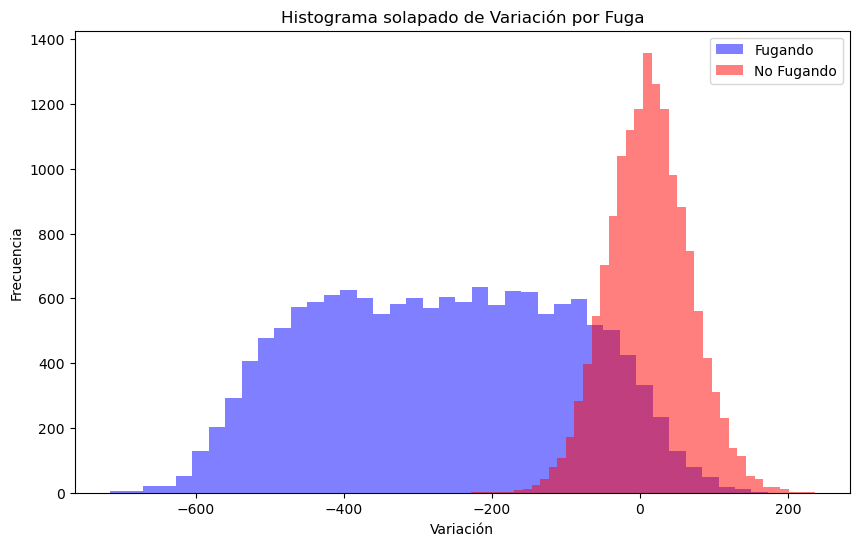

In [14]:
variacion_fuga_true = complete_train_data[complete_train_data['Fugando combustible'] == True]['Variacion']
variacion_fuga_false = complete_train_data[complete_train_data['Fugando combustible'] == False]['Variacion']

# Crear los histogramas solapados
plt.figure(figsize=(10, 6))

LAS_BINAS = 40

plt.hist(variacion_fuga_true, bins=LAS_BINAS, alpha=0.5, label='Fugando', color='blue')
plt.hist(variacion_fuga_false, bins=LAS_BINAS, alpha=0.5, label='No Fugando', color='red')

# Añadir título y etiquetas
plt.title('Histograma solapado de Variación por Fuga')
plt.xlabel('Variación')
plt.ylabel('Frecuencia')

# Añadir leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


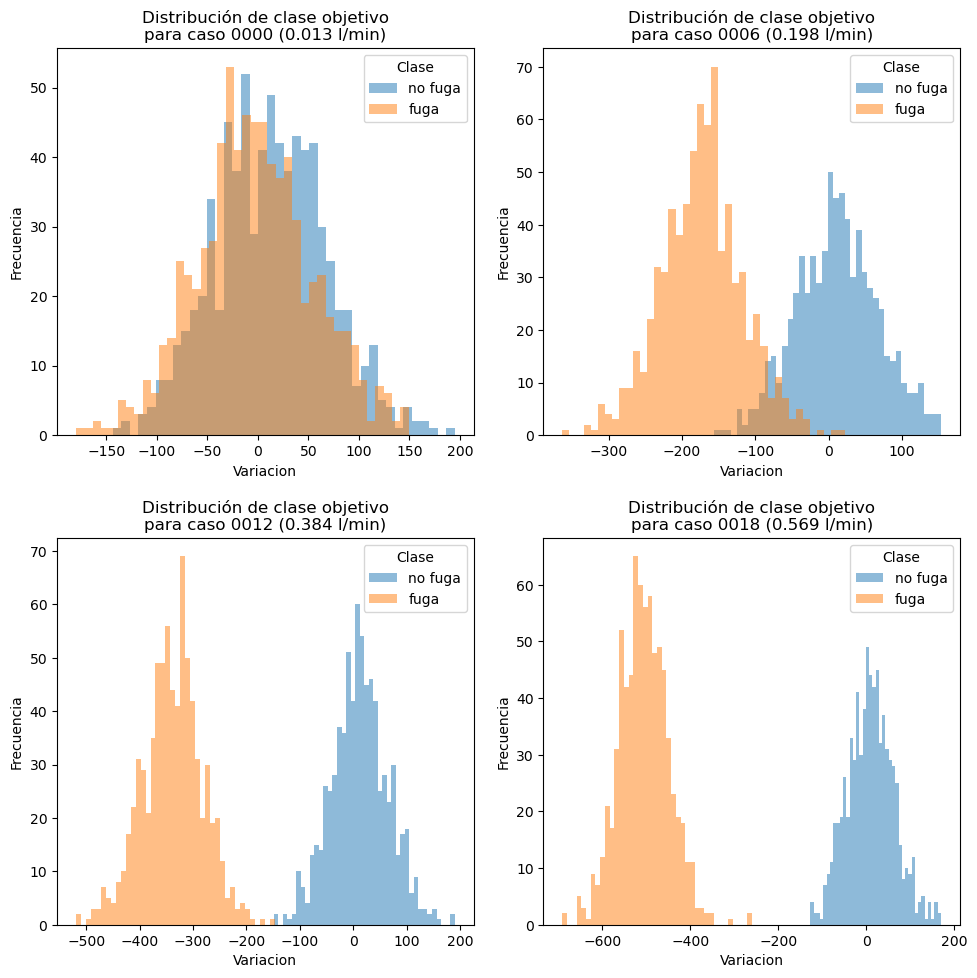

In [15]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10))

for i, axi in enumerate(ax.ravel()):
    case_number = i * 6
    selected_sequence = data_dict[f'case_{case_number:04}']['train_dataframe']
    leak_value = data_dict[f'case_{case_number:04}']['leak_value']

    unique_values = selected_sequence['Fugando combustible'].unique()

    for value in unique_values:
        subset = selected_sequence[selected_sequence['Fugando combustible'] == value]
        axi.hist(subset['Variacion'], bins=40, alpha=0.5, label='fuga' if value == 1 else 'no fuga')

    axi.set_xlabel('Variacion')
    axi.set_ylabel('Frecuencia')
    axi.set_title(f'Distribución de clase objetivo\npara caso {case_number:04} ({leak_value:.3f} l/min)')
    axi.legend(title='Clase')

fig.tight_layout(pad=1.5)

plt.savefig('../../docs/media/histo_variacion.eps', format='eps')
plt.show()

## Implementación de modelos

### Definición de métricas

In [16]:
def leak_detection_delay(y_true: np.array, y_pred: np.array) -> int:
    real_first_leak_day = 0
    while y_true[real_first_leak_day] != 1: real_first_leak_day += 1

    pred_first_leak_day = real_first_leak_day
    while y_pred[pred_first_leak_day] != 1:
        pred_first_leak_day += 1
        if pred_first_leak_day >= len(y_pred):
            break

    return (pred_first_leak_day - real_first_leak_day)

In [17]:
def performance_metrics(y_true, y_pred, leak_value = 0.013) -> dict:
    return {
        # Valor de referencia
            'leak_value': leak_value,
        # Metricas clasicas de ML
            'accuracy_score':   accuracy_score(y_true, y_pred),
            'f1_score':         f1_score(y_true, y_pred),
            'recall_score':     recall_score(y_true, y_pred),
            'precision_score':  precision_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred),
        # Metricas propias del problema
            'false_positives':  confusion_matrix(y_true, y_pred).ravel()[1],
            'leak_delay':       leak_detection_delay(y_true, y_pred),
            'leak_loss':        leak_detection_delay(y_true, y_pred) * leak_value * 60 * 24 if type(leak_value) != str else None
    }

### Modelo primitivo

In [18]:
class TrivialClassifier:
    def __init__(self, n_bins = 10) -> None:
        self.n_bins = n_bins

    
    def fit(self, D_train) -> None:
        fuga_true = D_train[D_train['Fugando combustible'] == True]['Variacion']
        fuga_false = D_train[D_train['Fugando combustible'] == False]['Variacion']

        def hist_list(subset):
            subset_linspace = np.linspace(min(subset), max(subset), self.n_bins)
            interv_count = [[subset_linspace[i], subset_linspace[i + 1], 0] for i in range(len(subset_linspace) - 1)]
            for value in subset:
                for element in interv_count:
                    if element[0] <= value < element[1]:
                        element[2] += 1
            interv_count[0][0] = float('-inf')
            interv_count[-1][1] = float('inf')
            return interv_count

        self.fuga_true_intervc = hist_list(fuga_true)
        self.fuga_false_intervc = hist_list(fuga_false)


    def predict(self, X_test) -> None:
        y_pred = []

        def find_interval_value(interv_count, selected_value):
            for (lower_bound, upper_bound, value) in interv_count:
                if lower_bound <= selected_value < upper_bound:
                    return value

        for value in X_test:
            true_value = find_interval_value(self.fuga_true_intervc, value)
            false_value = find_interval_value(self.fuga_false_intervc, value)

            y_pred.append(1 if true_value > false_value else 0)
        
        return y_pred

In [19]:
trv_model = TrivialClassifier(n_bins = 40)

trv_model.fit(complete_train_data)

y_pred = trv_model.predict(test_data[0][1]['Variacion'].to_list())

trv_results = [performance_metrics(test_data[0][1]['Fugando combustible'], y_pred, 'unknown')]
trv_seg_results = [
    performance_metrics(the_x[1]['Fugando combustible'], trv_model.predict(the_x[1]['Variacion']), the_x[0])
    for the_x in segmented_test_data
]

### Modelos clásicos

In [20]:
from sklearn.model_selection import GridSearchCV
import pickle as pkl

param_grids_path = '../../pkl/param_grids'

def train_classic_model(classifier_class, param_grid, train_data, cv = 5):
    param_pkl_path = f'{param_grids_path}/{classifier_class.__name__}.pkl'
    classifier = None
    X_train, y_train = train_data
    if os.path.exists(param_pkl_path):  # Param grid already known
        param_grid = pkl.load(open(param_pkl_path, 'rb'))
        classifier = classifier_class(**param_grid)
        classifier.fit(X_train, y_train)
    else:
        grid_search = GridSearchCV(
            estimator = classifier_class(),
            param_grid = param_grid,
            cv = cv
        )
        grid_search.fit(X_train, y_train)
        classifier = grid_search.best_estimator_
        pkl.dump(
            obj = grid_search.best_params_,
            file = open(param_pkl_path, 'wb')
        )
    return classifier

In [21]:
def test_classic_model(classifier, test_list) -> list[dict]:
    results = list()
    for (leak_value, test_data) in test_list:
        X_test = test_data.drop(columns='Fugando combustible')
        y_test = test_data['Fugando combustible']
        y_pred = classifier.predict(X_test)
        results.append(performance_metrics(y_test, y_pred, leak_value))
    return results

##### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = train_classic_model(RandomForestClassifier, rf_param_grid, train_data)

rf_seg_results = test_classic_model(rf_model, segmented_test_data)
rf_results = test_classic_model(rf_model, test_data)

In [23]:
rf_results

[{'leak_value': 'unknown',
  'accuracy_score': 0.8906,
  'f1_score': 0.8846153846153846,
  'recall_score': 0.8331788079470198,
  'precision_score': 0.9428207434052758,
  'confusion_matrix': array([[14137,   763],
         [ 2519, 12581]], dtype=int64),
  'false_positives': 763,
  'leak_delay': 4,
  'leak_loss': None}]

##### Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb_param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb_model = train_classic_model(GaussianNB, gnb_param_grid, train_data)

gnb_seg_results = test_classic_model(gnb_model, segmented_test_data)
gnb_results = test_classic_model(gnb_model, test_data)

##### KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_model = train_classic_model(KNeighborsClassifier, knn_param_grid, train_data)

knn_seg_results = test_classic_model(knn_model, segmented_test_data)
knn_results = test_classic_model(knn_model, test_data)

##### XGBoost Classifier

In [26]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = train_classic_model(XGBClassifier, xgb_param_grid, train_data)

xgb_seg_results = test_classic_model(xgb_model, segmented_test_data)
xgb_results = test_classic_model(xgb_model, test_data)

##### _Ensemble Classifier_

In [27]:
from sklearn.ensemble import VotingClassifier

vot_model = VotingClassifier(
    estimators=[
        # NOTE: Podría ponerle los hiperparámetros ideales 
        ('rf', RandomForestClassifier()),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ],
    voting='hard'
)

vot_model.fit(train_data[0], train_data[1])

vot_seg_results = test_classic_model(vot_model, segmented_test_data)
vot_results = test_classic_model(vot_model, test_data)

### Modelos _Deep Learning_

In [28]:
def test_dl_model(model, test_list):
    result_list = []
    for leak_value, test_dataframe in test_list:
        X_test = test_dataframe.drop(columns='Fugando combustible')
        y_test = test_dataframe['Fugando combustible']
        
        y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

        result_list.append(performance_metrics(y_test, y_pred, leak_value))

    return result_list

#### Único modelo de _Deep Learning_

In [29]:
X_train, y_train = train_data

##### Modelo unicapa

In [30]:
unil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(15, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

unil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = unil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_unil_seg_results = test_dl_model(unil_model, segmented_test_data)
dl_unil_results = test_dl_model(unil_model, test_data)

##### Modelo multicapa

In [31]:
multil_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(25, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(40, return_sequences=True, dropout=0.2),
    tf.keras.layers.LSTM(60, dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

multil_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = multil_model.fit(
    x = X_train,
    y = y_train,
    epochs = 50,
    batch_size = 8192,
    verbose = 0
)

dl_multil_seg_results = test_dl_model(multil_model, segmented_test_data)
dl_multil_results = test_dl_model(multil_model, test_data)

#### Múltiples modelos de _Deep Learning_

In [32]:
dl_multim_seg_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = data_dict[case]['leak_value']

    X_test = data_dict[case]['test_dataframe'].drop(columns='Fugando combustible')
    y_test = data_dict[case]['test_dataframe']['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_seg_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

In [33]:
dl_multim_results = []
for case in data_dict:
    X_train = data_dict[case]['train_dataframe'].drop(columns='Fugando combustible')
    y_train = data_dict[case]['train_dataframe']['Fugando combustible']
    
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
        tf.keras.layers.LSTM(15, dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        x = X_train,
        y = y_train,
        epochs = 50,
        batch_size = 8192,
        verbose = 0
    )

    leak_value = test_data[0][0]

    X_test = test_data[0][1].drop(columns='Fugando combustible')
    y_test = test_data[0][1]['Fugando combustible']
    
    y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

    dl_multim_results.append(performance_metrics(y_test, y_pred, leak_value))
    # model.save(f'../../pkl/models/{case}.keras')

c:\Users\cabre\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cabre\anaconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Modelo _ensemble_ de mini\_modelos de _Deep Learning_

In [34]:
from scipy.stats import mode

class HomebrewEnsembleClassifier:
    def __init__(self, model_list) -> None:
        self.model_list = model_list
    
    def predict(self, X_input, verbose = 0) -> np.ndarray:
        prediction_list = [model.predict(X_input, verbose=verbose) for model in self.model_list]
        ensemble_predictions, _ = mode(prediction_list, axis=0)
        return ensemble_predictions.ravel()

In [35]:
from tensorflow.keras.models import load_model

pkl_model_dir = '../../pkl/models'

model_list = [load_model(f'{pkl_model_dir}/{filename}') for filename in os.listdir(pkl_model_dir)]

dl_vot_model = HomebrewEnsembleClassifier(model_list)

In [36]:
dl_vot_seg_results = test_dl_model(dl_vot_model, segmented_test_data)
dl_vot_results = test_dl_model(dl_vot_model, test_data)

## Visualización de resultados

### Tablas de resultados

In [37]:
def display_result_table(results, name) -> None:
    df_chikito = pd.DataFrame.from_records(results).drop(columns='confusion_matrix')

    display(pd.DataFrame.from_records(results).drop(columns='confusion_matrix'))

    df_chikito.columns = [column.replace('_', '\\_') for column in df_chikito.columns]

    df_chikito.to_latex(
        f'../../docs/latex/{name.replace(" ", "_")}_table.tex',
        index = False,
        float_format = '%.4f'
    )

#### Trivial Classifier

In [38]:
display_result_table(trv_seg_results, 'Trivial Classifier')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.530000,0.224422,0.135099,0.662338,52,4,74.880000
1,0.043895,0.596667,0.415459,0.284768,0.767857,65,2,126.416842
2,0.074789,0.685333,0.592401,0.454305,0.851117,60,3,323.090526
3,0.105684,0.782667,0.750765,0.650331,0.887884,62,0,0.000000
4,0.136579,0.884000,0.880165,0.846358,0.916786,58,1,196.673684
5,0.167474,0.916000,0.916000,0.909934,0.922148,58,1,241.162105
6,0.198368,0.942000,0.943979,0.970861,0.918546,65,0,0.000000
7,0.229263,0.958000,0.959641,0.992053,0.929280,57,1,330.138947
8,0.260158,0.946000,0.948960,0.997351,0.905048,79,0,0.000000
9,0.291053,0.950667,0.953283,1.000000,0.910736,74,0,0.000000


In [39]:
display_result_table(trv_results, 'Trivial Classifier General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.885567,0.883489,0.861987,0.906091,1349,4,None


#### _Random Forest Classifier_

In [40]:
display_result_table(rf_seg_results, 'Random Forest')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.517333,0.138095,0.076821,0.682353,27,4,74.880000
1,0.043895,0.571333,0.312299,0.193377,0.811111,34,2,126.416842
2,0.074789,0.637333,0.475915,0.327152,0.872792,36,3,323.090526
3,0.105684,0.746667,0.684909,0.547020,0.915743,38,1,152.185263
4,0.136579,0.851333,0.835424,0.749669,0.943333,34,1,196.673684
5,0.167474,0.901333,0.896503,0.849007,0.949630,34,1,241.162105
6,0.198368,0.947333,0.947786,0.949669,0.945910,41,0,0.000000
7,0.229263,0.970000,0.970414,0.977483,0.963446,28,1,330.138947
8,0.260158,0.969333,0.970323,0.996026,0.945912,43,0,0.000000
9,0.291053,0.974667,0.975420,0.998675,0.953224,37,0,0.000000


In [41]:
display_result_table(rf_results, 'Random Forest General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.8906,0.884615,0.833179,0.942821,763,4,None


#### _Naive Bayes Classifier_

In [42]:
display_result_table(gnb_seg_results, 'Gaussian NB')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.516667,0.110429,0.059603,0.750000,15,4,74.880000
1,0.043895,0.548667,0.240180,0.141722,0.786765,29,2,126.416842
2,0.074789,0.621333,0.426263,0.279470,0.897872,24,3,323.090526
3,0.105684,0.720667,0.632778,0.478146,0.935233,25,2,304.370526
4,0.136579,0.826000,0.799076,0.687417,0.954044,25,1,196.673684
5,0.167474,0.890000,0.880694,0.806623,0.969745,19,1,241.162105
6,0.198368,0.946667,0.946019,0.928477,0.964237,26,0,0.000000
7,0.229263,0.976000,0.976096,0.973510,0.978695,16,1,330.138947
8,0.260158,0.977333,0.977865,0.994702,0.961588,30,0,0.000000
9,0.291053,0.978000,0.978613,1.000000,0.958122,33,0,0.000000


In [43]:
display_result_table(gnb_results, 'Gaussian NB General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.890533,0.88258,0.817351,0.959123,526,4,None


#### _KNN Classifier_

In [44]:
display_result_table(knn_seg_results, 'KNN')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.518000,0.152403,0.086093,0.663265,33,4,74.880000
1,0.043895,0.573333,0.319149,0.198675,0.810811,35,2,126.416842
2,0.074789,0.642000,0.490995,0.343046,0.863333,41,3,323.090526
3,0.105684,0.740667,0.677178,0.540397,0.906667,42,2,304.370526
4,0.136579,0.848667,0.832719,0.748344,0.938538,37,1,196.673684
5,0.167474,0.892000,0.886713,0.839735,0.939259,41,1,241.162105
6,0.198368,0.944667,0.945215,0.948344,0.942105,44,0,0.000000
7,0.229263,0.964000,0.964613,0.974834,0.954604,35,1,330.138947
8,0.260158,0.963333,0.964630,0.993377,0.937500,50,0,0.000000
9,0.291053,0.972667,0.973565,1.000000,0.948492,41,0,0.000000


In [45]:
display_result_table(knn_results, 'KNN General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.888267,0.882493,0.833576,0.937509,839,4,None


#### _XGBoost Classifier_

In [46]:
display_result_table(xgb_seg_results, 'XGBoost')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.522667,0.155660,0.087417,0.709677,27,4,74.880000
1,0.043895,0.565333,0.304904,0.189404,0.781421,40,2,126.416842
2,0.074789,0.647333,0.500472,0.350993,0.871711,39,3,323.090526
3,0.105684,0.755333,0.700408,0.568212,0.912766,41,0,0.000000
4,0.136579,0.864000,0.851744,0.776159,0.943639,35,1,196.673684
5,0.167474,0.911333,0.908213,0.871523,0.948127,36,1,241.162105
6,0.198368,0.951333,0.951815,0.954967,0.948684,39,0,0.000000
7,0.229263,0.970667,0.971354,0.988079,0.955186,35,1,330.138947
8,0.260158,0.969333,0.970323,0.996026,0.945912,43,0,0.000000
9,0.291053,0.970000,0.971061,1.000000,0.943750,45,0,0.000000


In [47]:
display_result_table(xgb_results, 'XGBoost General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.891633,0.886293,0.839073,0.939145,821,4,None


#### _Ensemble Classifier_

In [48]:
display_result_table(vot_seg_results, 'Ensemble')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.519333,0.119658,0.064901,0.765625,15,4,74.880000
1,0.043895,0.556000,0.263274,0.157616,0.798658,30,2,126.416842
2,0.074789,0.620000,0.427711,0.282119,0.883817,28,3,323.090526
3,0.105684,0.722000,0.636443,0.483444,0.931122,27,2,304.370526
4,0.136579,0.830667,0.805215,0.695364,0.956284,24,1,196.673684
5,0.167474,0.878667,0.867925,0.792053,0.959872,25,2,482.324211
6,0.198368,0.944000,0.943396,0.927152,0.960219,29,0,0.000000
7,0.229263,0.972000,0.972074,0.968212,0.975968,18,1,330.138947
8,0.260158,0.976000,0.976562,0.993377,0.960307,31,0,0.000000
9,0.291053,0.980000,0.980519,1.000000,0.961783,30,0,0.000000


In [49]:
display_result_table(vot_results, 'Ensemble General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.8899,0.882074,0.818079,0.956929,556,4,None


#### Modelo DL unicapa

In [50]:
display_result_table(dl_unil_seg_results, 'DL Unicapa')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.519333,0.134454,0.074172,0.717949,22,4,74.880000
1,0.043895,0.564000,0.287582,0.174834,0.809816,31,2,126.416842
2,0.074789,0.636667,0.469328,0.319205,0.886029,31,3,323.090526
3,0.105684,0.743333,0.675105,0.529801,0.930233,30,1,152.185263
4,0.136579,0.846667,0.828358,0.735099,0.948718,30,1,196.673684
5,0.167474,0.906667,0.901961,0.852980,0.956909,29,1,241.162105
6,0.198368,0.952000,0.952128,0.948344,0.955941,33,0,0.000000
7,0.229263,0.975333,0.975706,0.984106,0.967448,25,1,330.138947
8,0.260158,0.974667,0.975357,0.996026,0.955527,35,0,0.000000
9,0.291053,0.972000,0.972938,1.000000,0.947302,42,0,0.000000


In [51]:
display_result_table(dl_unil_results, 'DL Unicapa General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.892233,0.885836,0.830662,0.948861,676,4,None


#### Modelo DL multicapa

In [52]:
display_result_table(dl_multil_seg_results, 'DL Multicapa')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.514000,0.092154,0.049007,0.770833,11,40,748.800000
1,0.043895,0.543333,0.202561,0.115232,0.836538,17,15,948.126316
2,0.074789,0.602667,0.371308,0.233113,0.911917,17,3,323.090526
3,0.105684,0.695333,0.581118,0.419868,0.943452,19,2,304.370526
4,0.136579,0.800000,0.757674,0.621192,0.971014,14,1,196.673684
5,0.167474,0.876000,0.862426,0.772185,0.976549,14,1,241.162105
6,0.198368,0.942000,0.940206,0.905960,0.977143,16,1,285.650526
7,0.229263,0.975333,0.975151,0.961589,0.989101,8,1,330.138947
8,0.260158,0.982667,0.982917,0.990728,0.975228,19,0,0.000000
9,0.291053,0.984000,0.984355,1.000000,0.969191,24,0,0.000000


In [53]:
display_result_table(dl_multil_results, 'DL Multicapa General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.889367,0.879655,0.803311,0.972033,349,40,None


#### Modelo DL multiple

In [54]:
display_result_table(dl_multim_seg_results, 'DL Multimodelo')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.546000,0.526755,0.501987,0.554094,305,0,0.000000
1,0.043895,0.639333,0.620351,0.585430,0.659701,228,0,0.000000
2,0.074789,0.708667,0.739416,0.821192,0.672451,302,0,0.000000
3,0.105684,0.758667,0.797991,0.947020,0.689489,322,0,0.000000
4,0.136579,0.804667,0.834370,0.977483,0.727811,276,0,0.000000
5,0.167474,0.892000,0.898496,0.949669,0.852556,124,0,0.000000
6,0.198368,0.268667,0.000000,0.000000,0.000000,342,755,215666.147368
7,0.229263,0.846000,0.867012,0.997351,0.766802,229,0,0.000000
8,0.260158,0.888667,0.900299,0.998675,0.819565,166,0,0.000000
9,0.291053,0.481333,0.000000,0.000000,0.000000,23,755,316432.421053


In [55]:
display_result_table(dl_multim_results, 'DL Multimodelo General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.764733,0.802020,0.946755,0.695669,6254,0,None
1,unknown,0.857100,0.859337,0.867219,0.851597,2282,4,None
2,unknown,0.481467,0.012192,0.006358,0.148148,552,7,None
3,unknown,0.491633,0.003919,0.001987,0.142180,181,21,None
4,unknown,0.850267,0.858831,0.904901,0.817225,3056,0,None
5,unknown,0.840033,0.811293,0.683179,0.998548,15,707,None
6,unknown,0.632733,0.706906,0.879934,0.590743,9205,2,None
7,unknown,0.886033,0.883814,0.861192,0.907657,1323,4,None
8,unknown,0.476533,0.011954,0.006291,0.119647,699,30,None
9,unknown,0.823900,0.840330,0.920662,0.772892,4085,0,None


#### Modelo DL _ensemble_

In [56]:
display_result_table(dl_vot_seg_results, 'DL Ensemble')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,0.013000,0.500000,0.076355,0.041060,0.543860,26,7,131.040000
1,0.043895,0.497333,0.066832,0.035762,0.509434,26,39,2465.128421
2,0.074789,0.484000,0.046798,0.025166,0.333333,38,45,4846.357895
3,0.105684,0.483333,0.017744,0.009272,0.205882,27,45,6848.336842
4,0.136579,0.485333,0.002584,0.001325,0.052632,18,710,139638.315789
5,0.167474,0.479333,0.000000,0.000000,0.000000,26,755,182077.389474
6,0.198368,0.480667,0.000000,0.000000,0.000000,24,755,215666.147368
7,0.229263,0.481333,0.002564,0.001325,0.040000,24,583,192471.006316
8,0.260158,0.480667,0.000000,0.000000,0.000000,24,755,282843.663158
9,0.291053,0.484000,0.000000,0.000000,0.000000,19,755,316432.421053


In [57]:
display_result_table(dl_vot_results, 'DL Ensemble General')

,leak_value,accuracy_score,f1_score,recall_score,precision_score,false_positives,leak_delay,leak_loss
0,unknown,0.4833,0.010974,0.005695,0.150087,487,7,None


### Matrices de confusión

In [58]:
def display_conf_matrix(confusion_matrix, name):
    disp = ConfusionMatrixDisplay(
        confusion_matrix,
        display_labels=['No fuga', 'Fuga']
    ).plot(colorbar=False)

    plt.title(f'Resultados de {name}', fontsize=14)

    plt.xlabel('Etiqueta Predicha', fontsize=12)
    plt.ylabel('Etiqueta Verdadera', fontsize=12)

    for text in disp.text_.ravel():
        text.set_fontsize(11)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.savefig(
        f'../../docs/media/cm_{name.replace(" ", "_")}.eps',
        format='eps'    
    )

#### Trivial Classifier

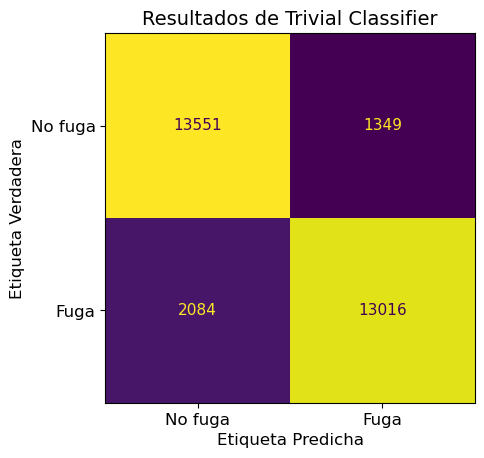

In [59]:
display_conf_matrix(trv_results[0]['confusion_matrix'], 'Trivial Classifier')

#### _Random Forest Classifier_

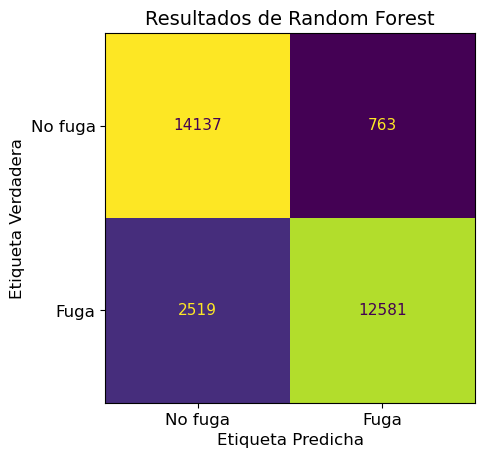

In [60]:
display_conf_matrix(rf_results[0]['confusion_matrix'], 'Random Forest')

#### _Gaussian NB Classifier_

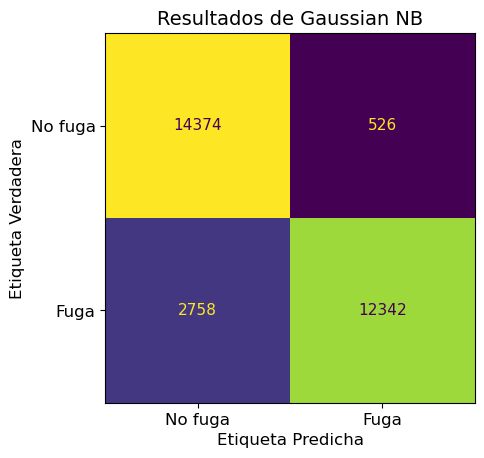

In [61]:
display_conf_matrix(gnb_results[0]['confusion_matrix'], 'Gaussian NB')

#### _KNN Classifier_

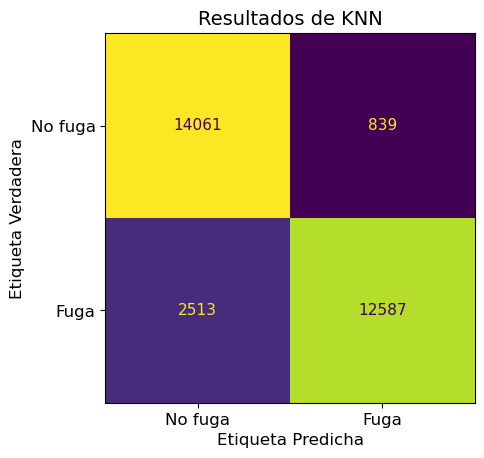

In [62]:
display_conf_matrix(knn_results[0]['confusion_matrix'], 'KNN')

#### _XGBoost Classifier_

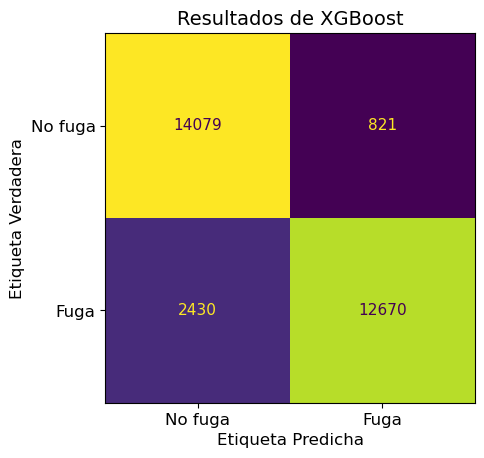

In [63]:
display_conf_matrix(xgb_results[0]['confusion_matrix'], 'XGBoost')

#### _Ensemble Classifier_

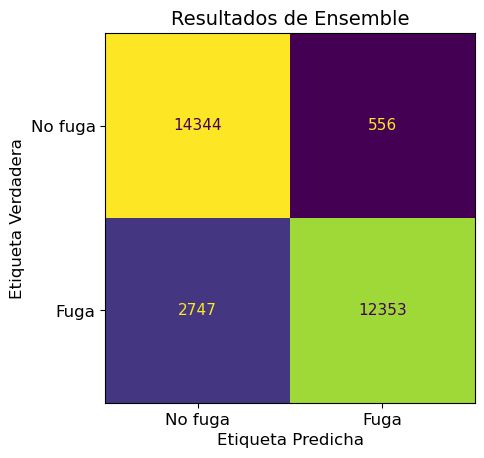

In [64]:
display_conf_matrix(vot_results[0]['confusion_matrix'], 'Ensemble')

#### Modelo DL unicapa

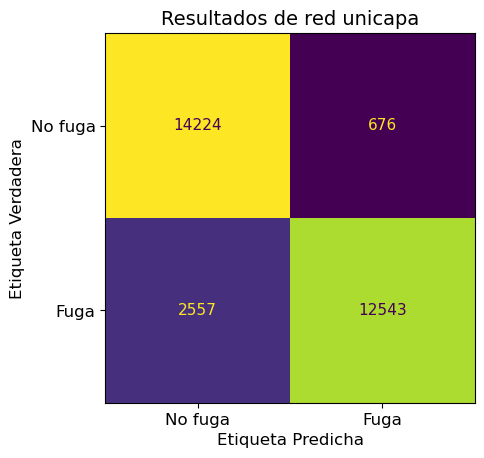

In [65]:
display_conf_matrix(dl_unil_results[0]['confusion_matrix'], 'red unicapa')

#### Modelo DL multicapa

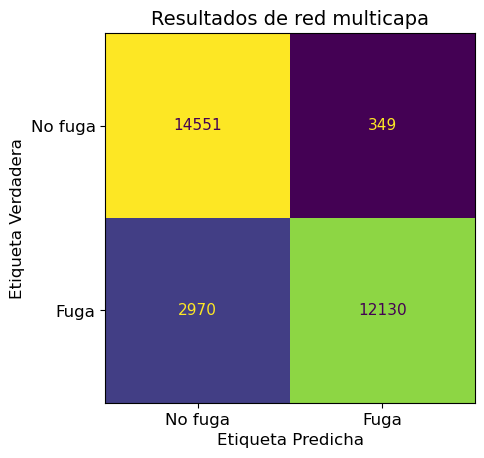

In [66]:
display_conf_matrix(dl_multil_results[0]['confusion_matrix'], 'red multicapa')

#### Modelo DL _ensemble_

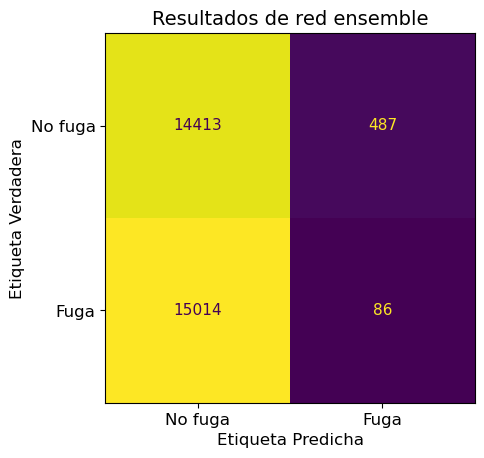

In [67]:
display_conf_matrix(dl_vot_results[0]['confusion_matrix'], 'red ensemble')

### Otros

In [68]:
display_seg_list = [
    ('Trivial Classifier',  trv_seg_results),
    ('Random Forest',       rf_seg_results),
    ('Gaussian NB',         gnb_seg_results),
    ('KNN',                 knn_seg_results),
    ('XGBoost',             xgb_seg_results),
    ('Ensemble',            vot_seg_results),
    ('LSTM unilayer',       dl_unil_seg_results),
    ('LSTM multilayer',     dl_multil_seg_results),
    ('LSTM ensemble',       dl_vot_seg_results)
]

In [69]:
display_list = [
    ('Trivial Classifier',  trv_results),
    ('Random Forest',       rf_results),
    ('Gaussian NB',         gnb_results),
    ('KNN',                 knn_results),
    ('XGBoost',             xgb_results),
    ('Ensemble',            vot_results),
    ('DL unilayer',         dl_unil_results),
    ('DL multilayer',       dl_multil_results),
    ('DL ensemble',         dl_vot_results)
]

#### Comparativa de falsos positivos

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


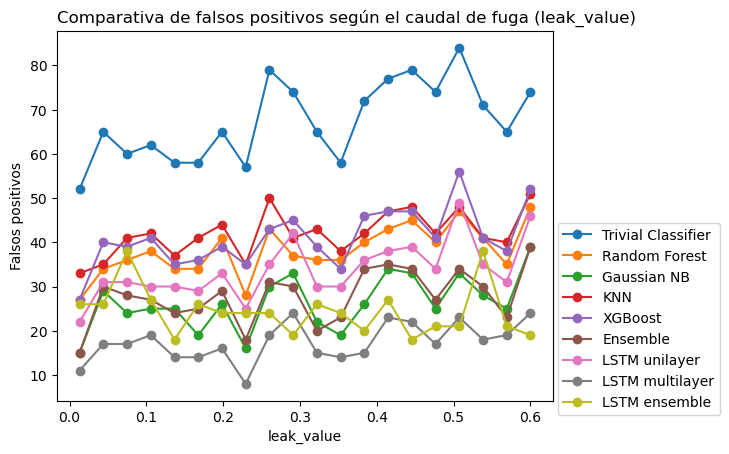

In [70]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['false_positives'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de falsos positivos según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Falsos positivos')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_falsos_positivos.eps', format='eps')

plt.show()

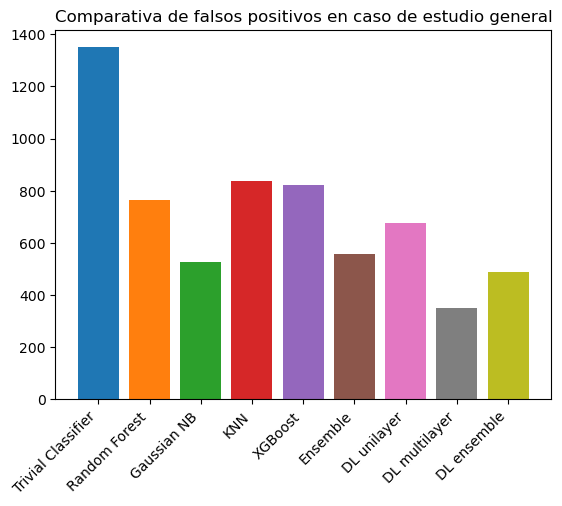

In [71]:
for (name, results) in display_list:
    plt.bar(name, results[0]['false_positives'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de falsos positivos en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_falsos_positivos_g.eps', format='eps')

plt.show()

#### Comparativa de sensibilidad (_recall_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


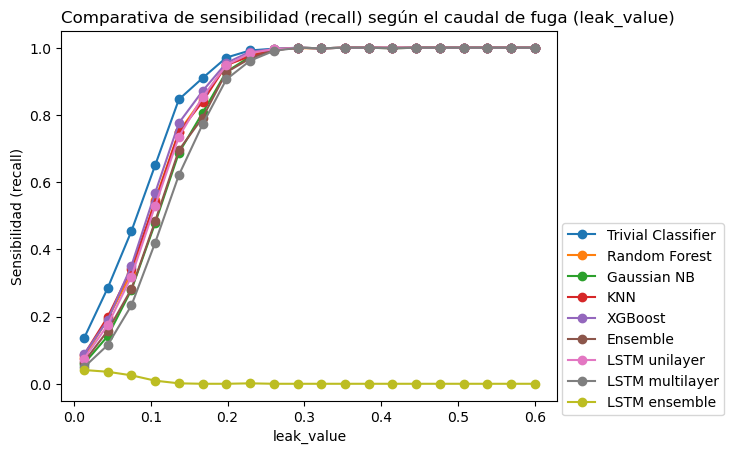

In [72]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['recall_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de sensibilidad (recall) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Sensibilidad (recall)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_recall.eps', format='eps')

plt.show()

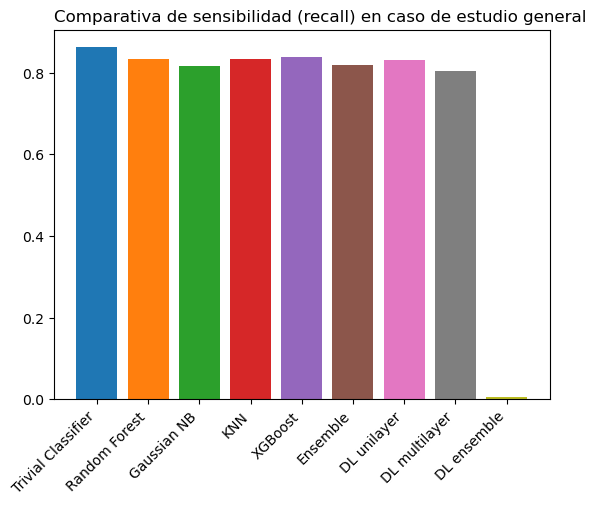

In [73]:
for (name, results) in display_list:
    plt.bar(name, results[0]['recall_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de sensibilidad (recall) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_recall_g.eps', format='eps')

plt.show()

#### Comparativa de exactitud (_accuracy_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


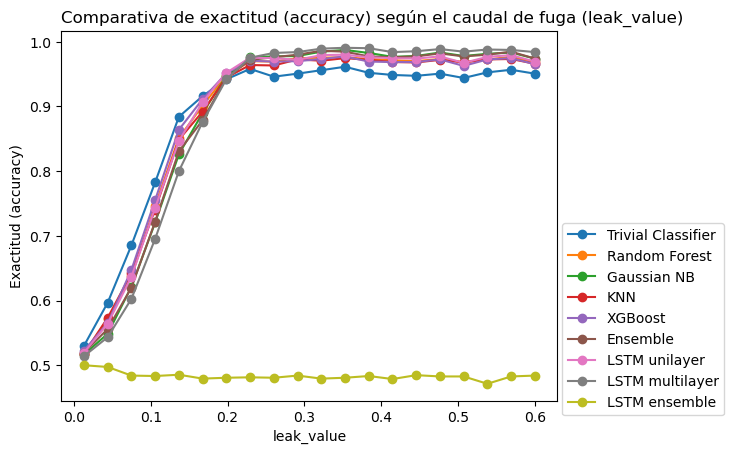

In [74]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['accuracy_score'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de exactitud (accuracy) según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Exactitud (accuracy)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_accuracy.eps', format='eps')

plt.show()

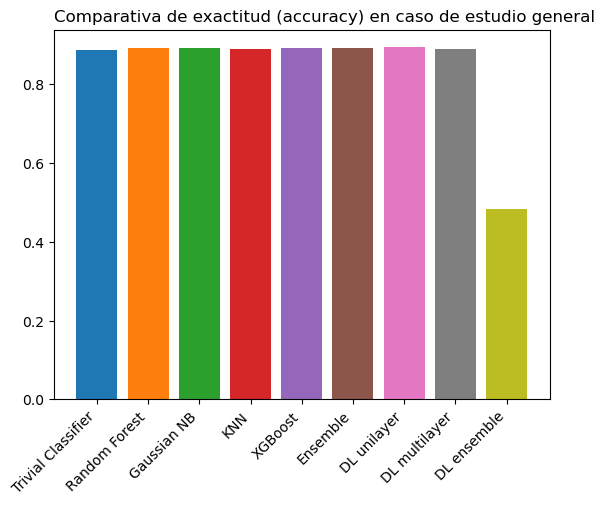

In [75]:
for (name, results) in display_list:
    plt.bar(name, results[0]['accuracy_score'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de exactitud (accuracy) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_accuracy_g.eps', format='eps')

plt.show()

#### Comparativa de días hasta detección de fuga 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


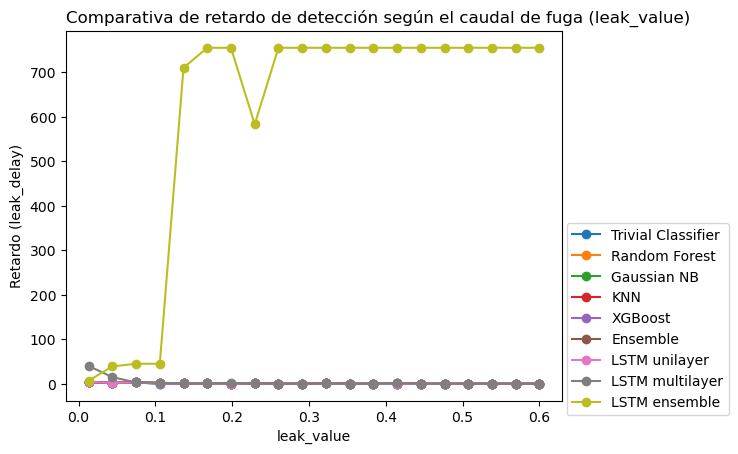

In [76]:
for (name, results) in display_seg_list:
    plt.plot(
        [df['leak_value'] for df in results],
        [df['leak_delay'] for df in results],
        marker='o',
        label=name
    )

plt.title('Comparativa de retardo de detección según el caudal de fuga (leak_value)', loc='left')
plt.xlabel('leak_value')
plt.ylabel('Retardo (leak_delay)')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 0.5))

plt.savefig('../../docs/media/comp_leak_delay.eps', format='eps')

plt.show()

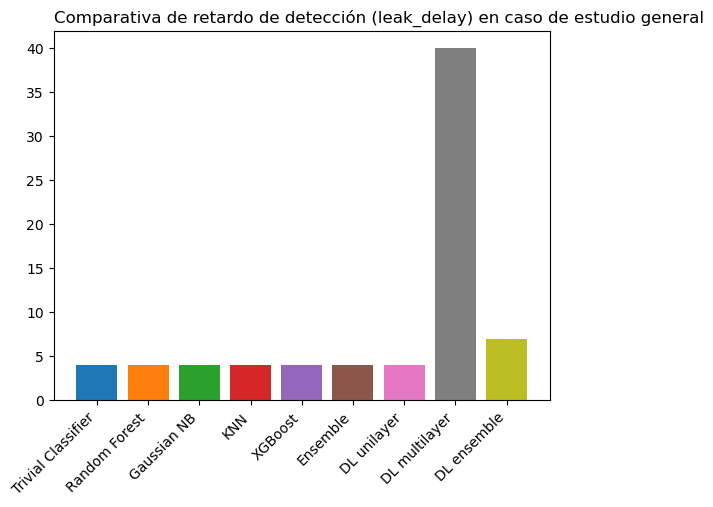

In [77]:
for (name, results) in display_list:
    plt.bar(name, results[0]['leak_delay'])

plt.xticks(rotation=45, ha='right')
plt.title('Comparativa de retardo de detección (leak_delay) en caso de estudio general', loc='left')

plt.savefig('../../docs/media/comp_leak_delay_g.eps', format='eps')

plt.show()